In [1]:
#import modules and dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from pprint import pprint
from config import gkey
from config import api_key
gmaps.configure(api_key= gkey)

merged_table=(pd.read_csv('data/mergedtable.csv'))

west_data = merged_table.loc[merged_table['State']=='CA']
east_data = merged_table.loc[merged_table['State']=='NY']
south_data = merged_table.loc[merged_table['State']=='TX']
north_data = merged_table.loc[merged_table['State']=='IL']

In [2]:
merged_table.head()

,Business,City,State,Category,Latitude,Longitude,Price,Reviews,Rating
0,Bi-Rite Creamery,San Francisco,CA,Ice Cream & Frozen Yogurt,37.761591,-122.425717,1,9522,4.5
1,Brenda's French Soul Food,San Francisco,CA,French,37.782902,-122.419043,2,10740,4.0
2,Gary Danko,San Francisco,CA,American (New),37.805870,-122.420580,4,5439,4.5
3,Tartine Bakery & Cafe,San Francisco,CA,Bakeries,37.761425,-122.424051,2,7768,4.0
4,Hog Island Oyster Co,San Francisco,CA,Seafood,37.795831,-122.393303,2,5819,4.5


# East Breakdown - Manhattan, NY

In [3]:
#Manhattan, New York
grouped_east_df = east_data.groupby('Category')

#counts the total of each category within the column
total_east_category = grouped_east_df['Category'].count()
east_price_avg = grouped_east_df['Price'].mean()
east_review_counts = grouped_east_df['Reviews'].mean()
east_review_counts.head()
east_rating_counts = grouped_east_df['Rating'].mean()

#This will populate an array of all categories in Sample.
east_category_unique = east_data["Category"].unique()
east_category_unique #121 unique categories
east_total_categories = len(east_category_unique)

#Populate a dataframe with specfics on Manhattan,NY Grouped by Category.
east_category_stats_df= pd.DataFrame({
    "Number of Restaurants": total_east_category,
    "Average Price of Category": east_price_avg.round(2),
    "Average # of Reviews per Restaurant": east_review_counts.astype(int),
    "Average Rating by Category": east_rating_counts.round(2)
})
east_category_stats_df.sort_values(by='Number of Restaurants', ascending=False).head(10)

,Number of Restaurants,Average Price of Category,Average # of Reviews per Restaurant,Average Rating by Category
Category,,,,
Italian,80,2.38,1110,4.09
American (New),59,2.76,1135,4.07
Bakeries,46,1.74,1465,4.11
Japanese,45,2.53,1037,4.11
Coffee & Tea,39,1.64,731,4.26
Pizza,37,1.70,1304,4.09
Seafood,31,2.32,1069,4.11
Chinese,30,1.73,1114,4.02
Korean,27,2.26,1046,4.13


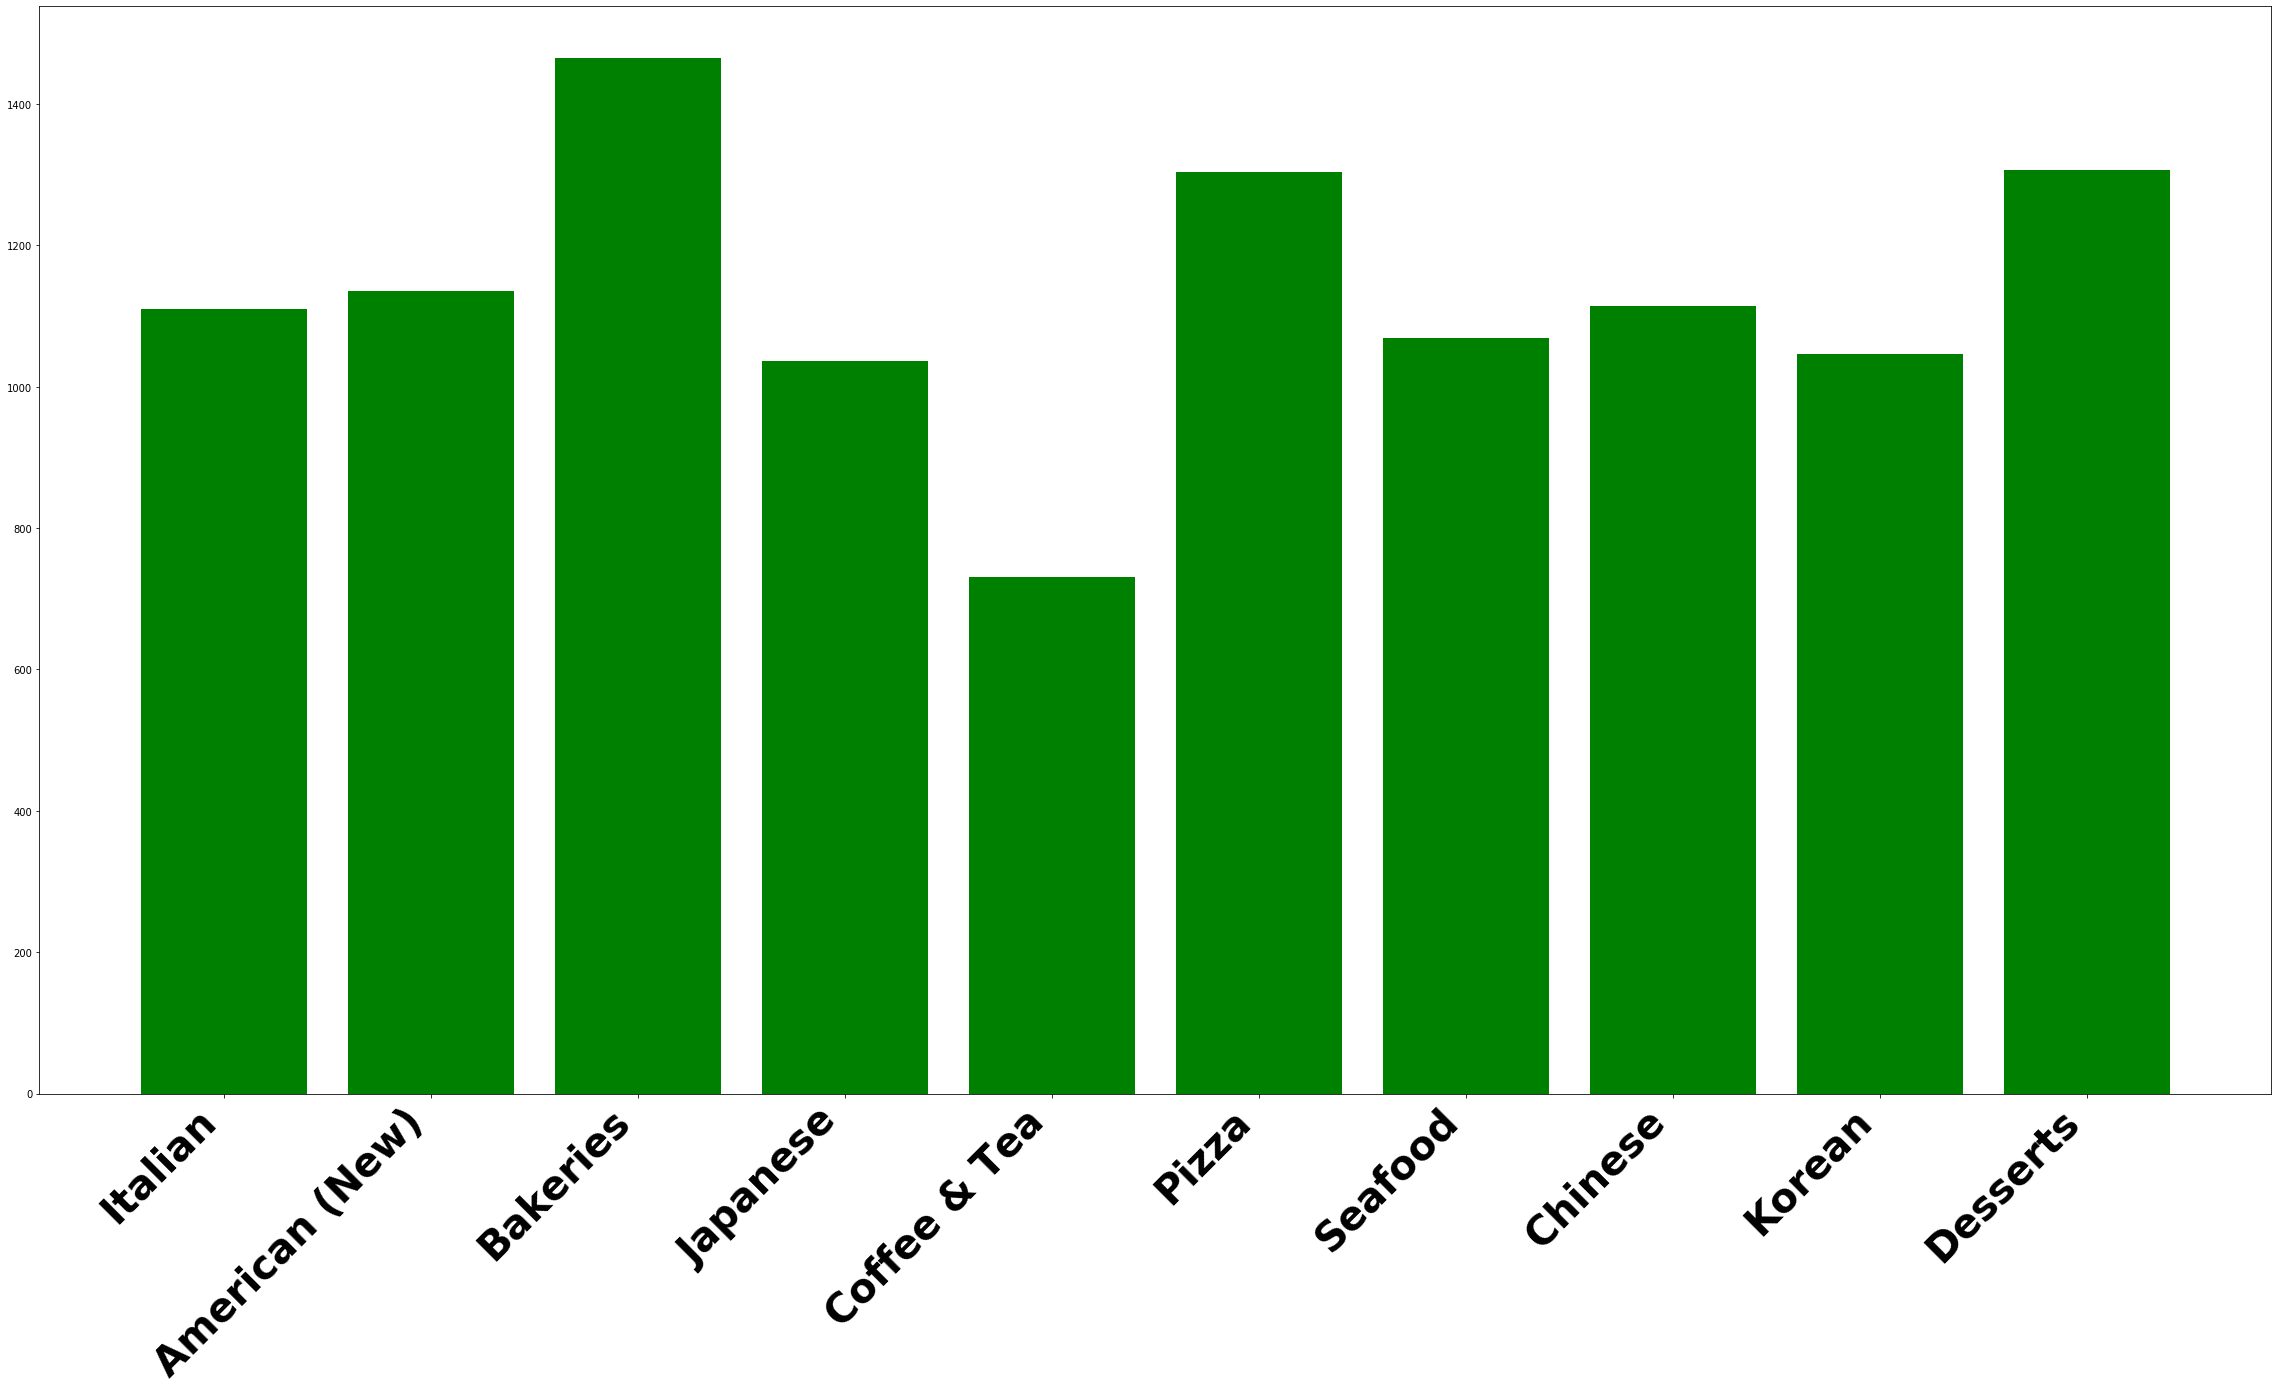

In [49]:
# Bar Graph 
east_top_ten = pd.DataFrame(east_category_stats_df.sort_values(by='Number of Restaurants', ascending=False).head(10))
east_top_ten = east_top_ten.reset_index()
east_topten_unique = east_top_ten["Category"].unique()
east_bar_topten = east_top_ten["Average # of Reviews per Restaurant"]
x_axis = east_topten_unique
plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, east_bar_topten, color='green', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, east_topten_unique, rotation=45, weight="bold", fontsize=40, ha = 'right');

# plt.xlim(-0.75, len(x_axis));
# plt.ylim(0, max(east_bar_avg_review)+100);
# plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=40, weight="bold");
# plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=40);
# plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=40);
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/Top_Ten_East_BarGraph_Average_Reviews_By_Categories.png")


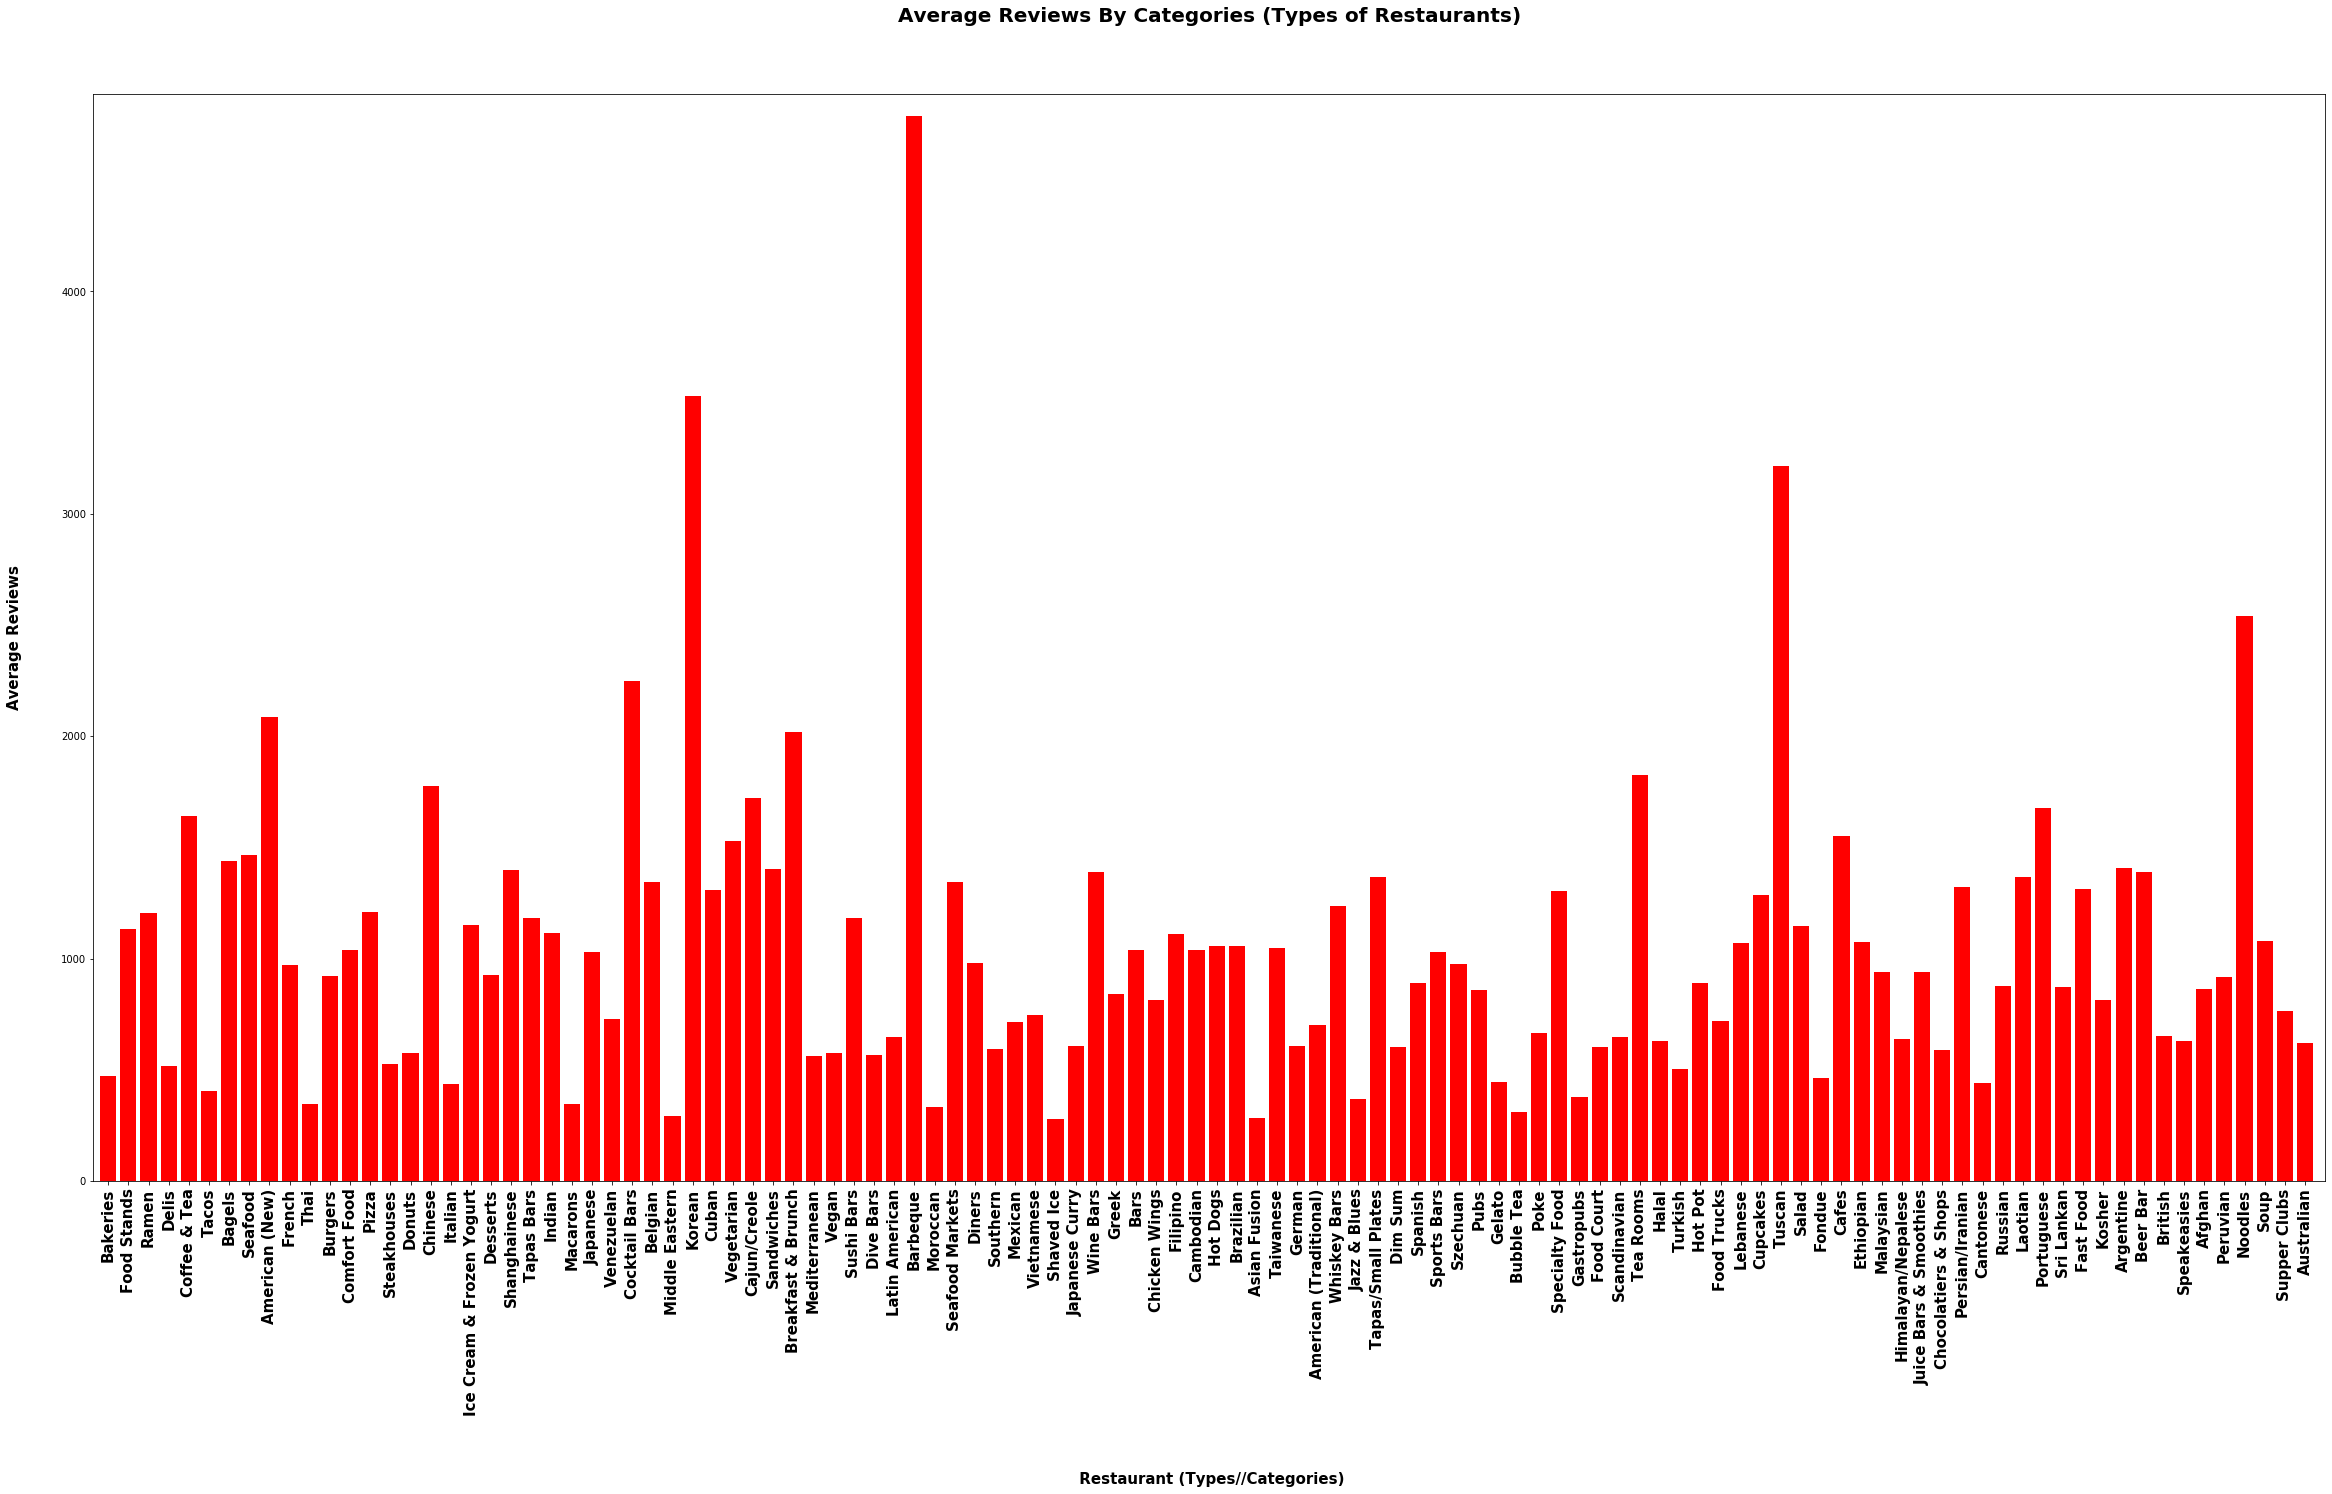

In [10]:
# Bar Graph 

east_bar_avg_review = east_category_stats_df["Average # of Reviews per Restaurant"]
x_axis = east_category_unique # len is = 28
# x_axis

plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, east_bar_avg_review, color='red', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, east_category_unique, rotation=90, weight="bold", fontsize=15);

plt.xlim(-0.75, len(x_axis));
plt.ylim(0, max(east_bar_avg_review)+100);

# threshold = 4000
# above_threshold = np.maximum(bar_avg_review - threshold, 0)
# below_threshold = np.minimum(bar_avg_review, threshold)
# fig, ax = plt.subplots()
# ax.bar(x_axis, below_threshold, 0.35, color="g")
# ax.bar(x_axis, above_threshold, 0.35, color="r",
#         bottom=below_threshold)
# ax.plot([-0.75, 30], [threshold, threshold], "k--")

plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=20, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=15);
plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=15);


# axhline -  adding a line that represents a good threshold
# 1000 being a good standard average 
# 3000 + being above average
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/East_BarGraph_Average_Reviews_By_Categories.png")

# print("MEAN")
# print(bar_avg_review.mean())
# print("MEDIAN")
# print(bar_avg_review.median())
# print("MODE")
# print(bar_avg_review.mode())

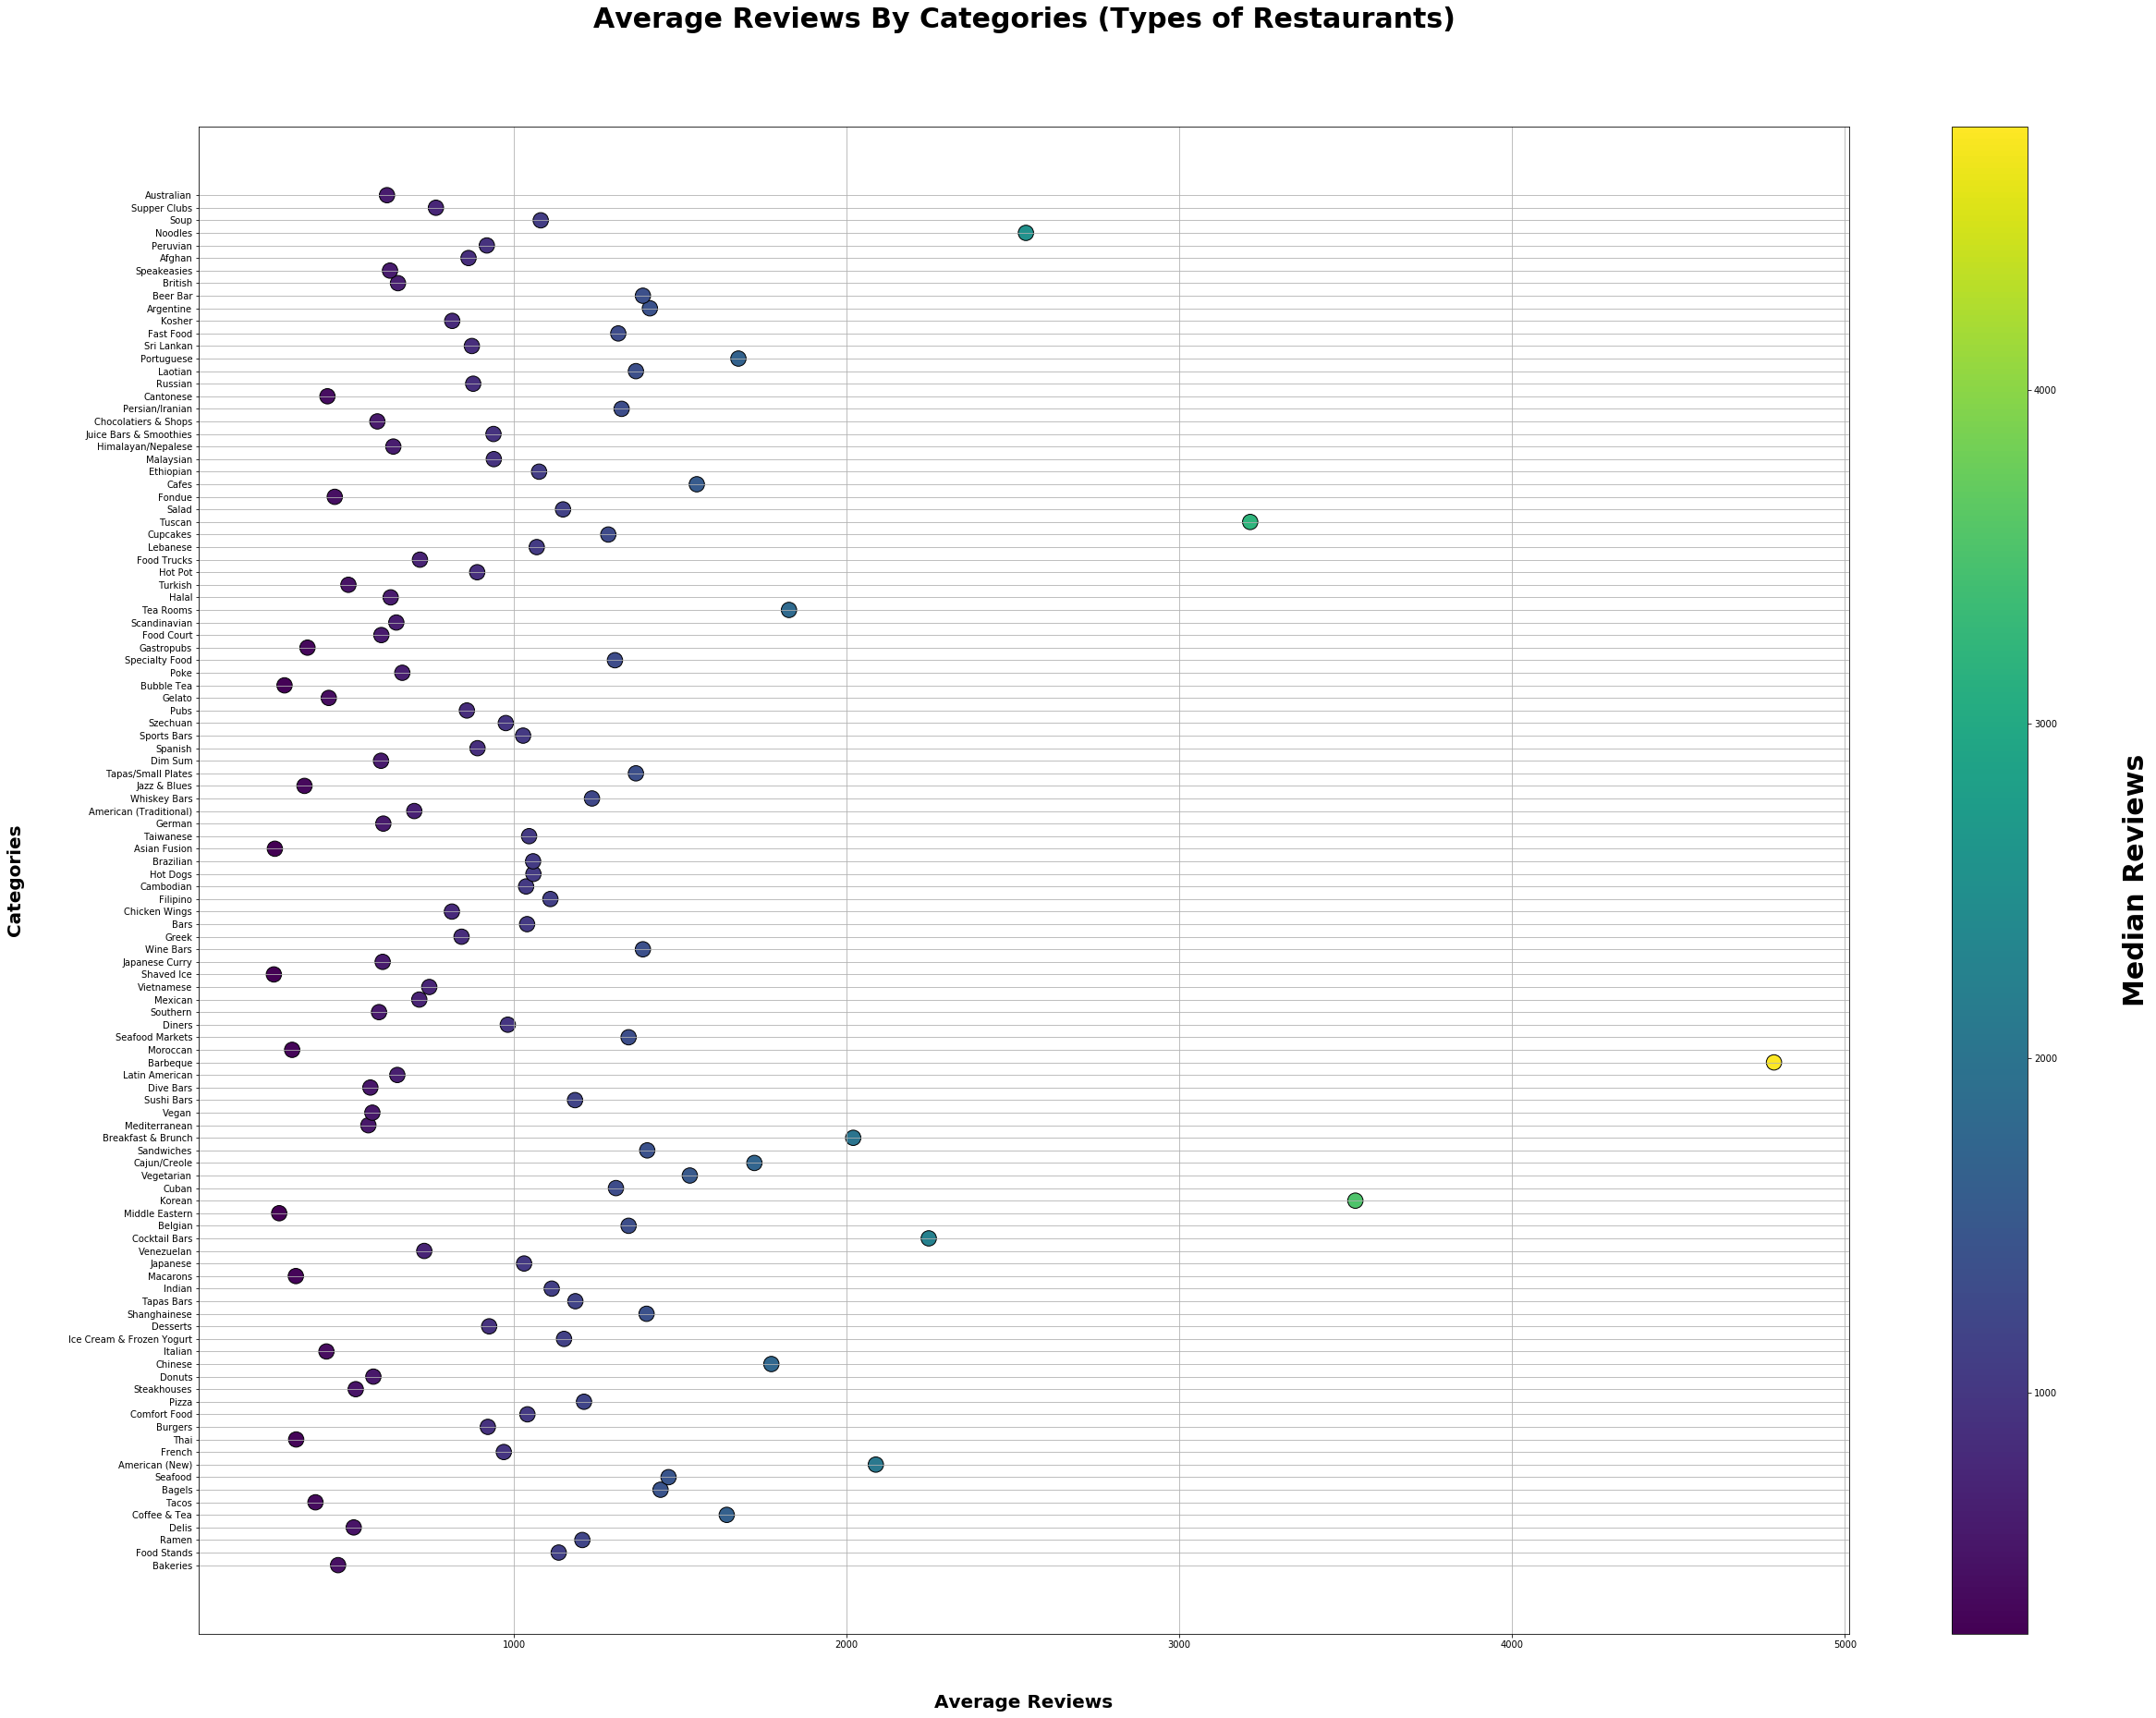

In [11]:
# Scatter Plot 

plt.figure(figsize=(40,30))

plt.scatter(east_bar_avg_review, x_axis, c=east_bar_avg_review, s=275, edgecolor="black")
clb = plt.colorbar()
plt.grid()


plt.xlabel("\n\nAverage Reviews", fontsize=20, weight="bold");
plt.ylabel("Categories\n\n", fontsize=20, weight="bold");
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=30, weight="bold");
clb.set_label("\n\nMedian Reviews", fontsize=30, weight="bold")

plt.savefig("plots/East_ScatterPlot_Average_Reviews_By_Categories.png")


In [12]:
# need a location variable to plot heatmap
newyork_coordinates = east_data[["Latitude", "Longitude"]]
# newyork_coordinates
weights = east_data["Reviews"].astype(float)
# Heatmap 
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(newyork_coordinates, weights=weights,
                                   max_intensity=100,
                                   point_radius=10)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# California Breakdown - SanFrancisco

In [13]:
grouped_west_df = west_data.groupby('Category')
#counts the total of each category within the column
total_west_category = grouped_west_df['Category'].count()
#gets the average amount of reviews by category
west_price_avg = grouped_west_df['Price'].mean()
west_review_counts = grouped_west_df['Reviews'].mean()
west_review_counts.head()
west_rating_counts = grouped_west_df['Rating'].mean()
west_category_unique = west_data["Category"].unique()
west_category_unique #95 unique categories
west_total_categories = len(west_category_unique)
west_category_stats_df= pd.DataFrame({
    "Number of Restaurants": total_west_category,
    "Average Price of Category": west_price_avg.round(2),
    "Average # of Reviews per Restaurant": west_review_counts.astype(int),
    "Percentage of Ratings": west_rating_counts.round(2)
})
west_category_stats_df.head()


,Number of Restaurants,Average Price of Category,Average # of Reviews per Restaurant,Percentage of Ratings
Category,,,,
Afghan,1,2.00,538,4.50
American (New),26,2.92,1649,4.12
American (Traditional),15,2.40,2302,4.03
Asian Fusion,3,3.00,3053,4.00
Bakeries,32,1.50,1604,4.30


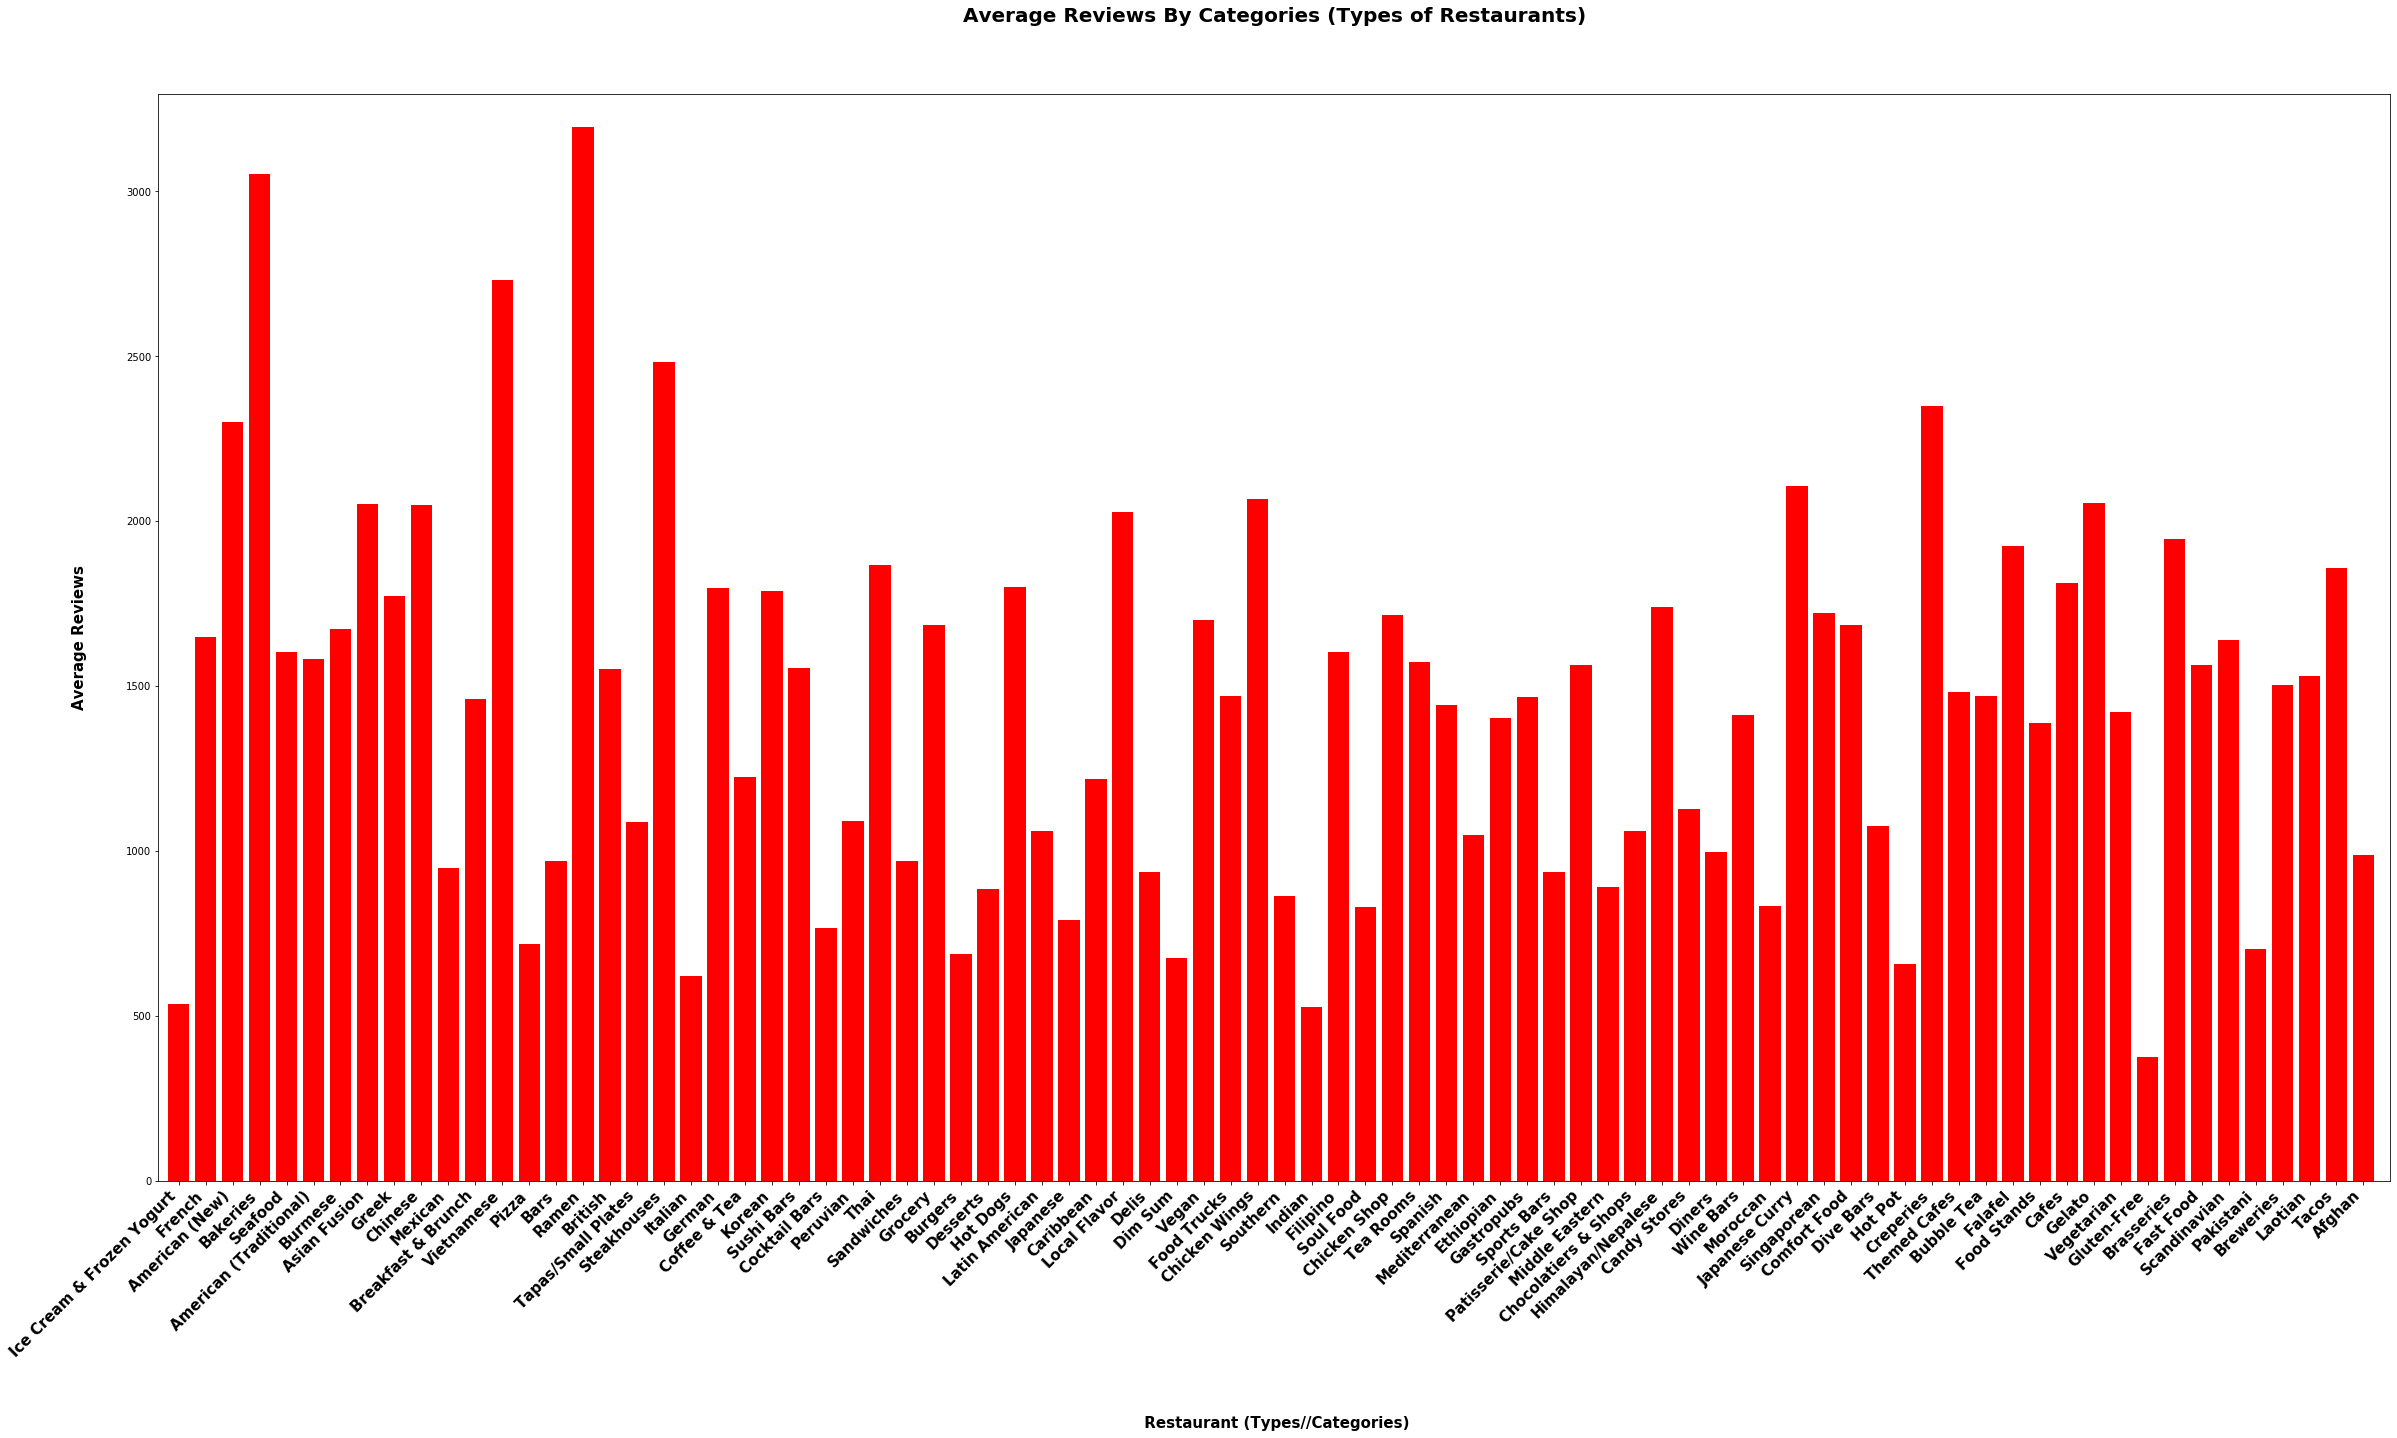

In [15]:
# Bar Graph 

west_bar_avg_review = west_category_stats_df["Average # of Reviews per Restaurant"]
x_axis = west_category_unique # len is = 28
# x_axis

plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, west_bar_avg_review, color='red', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, west_category_unique, rotation=45, weight="bold", fontsize=15, ha='right');

plt.xlim(-0.75, len(x_axis));
plt.ylim(0, max(west_bar_avg_review)+100);

# threshold = 4000
# above_threshold = np.maximum(bar_avg_review - threshold, 0)
# below_threshold = np.minimum(bar_avg_review, threshold)
# fig, ax = plt.subplots()
# ax.bar(x_axis, below_threshold, 0.35, color="g")
# ax.bar(x_axis, above_threshold, 0.35, color="r",
#         bottom=below_threshold)
# ax.plot([-0.75, 30], [threshold, threshold], "k--")

plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=20, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=15);
plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=15);


# axhline -  adding a line that represents a good threshold
# 1000 being a good standard average 
# 3000 + being above average
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/West_BarGraph_Average_Reviews_By_Categories.png")

# print("MEAN")
# print(bar_avg_review.mean())
# print("MEDIAN")
# print(bar_avg_review.median())
# print("MODE")
# print(bar_avg_review.mode())

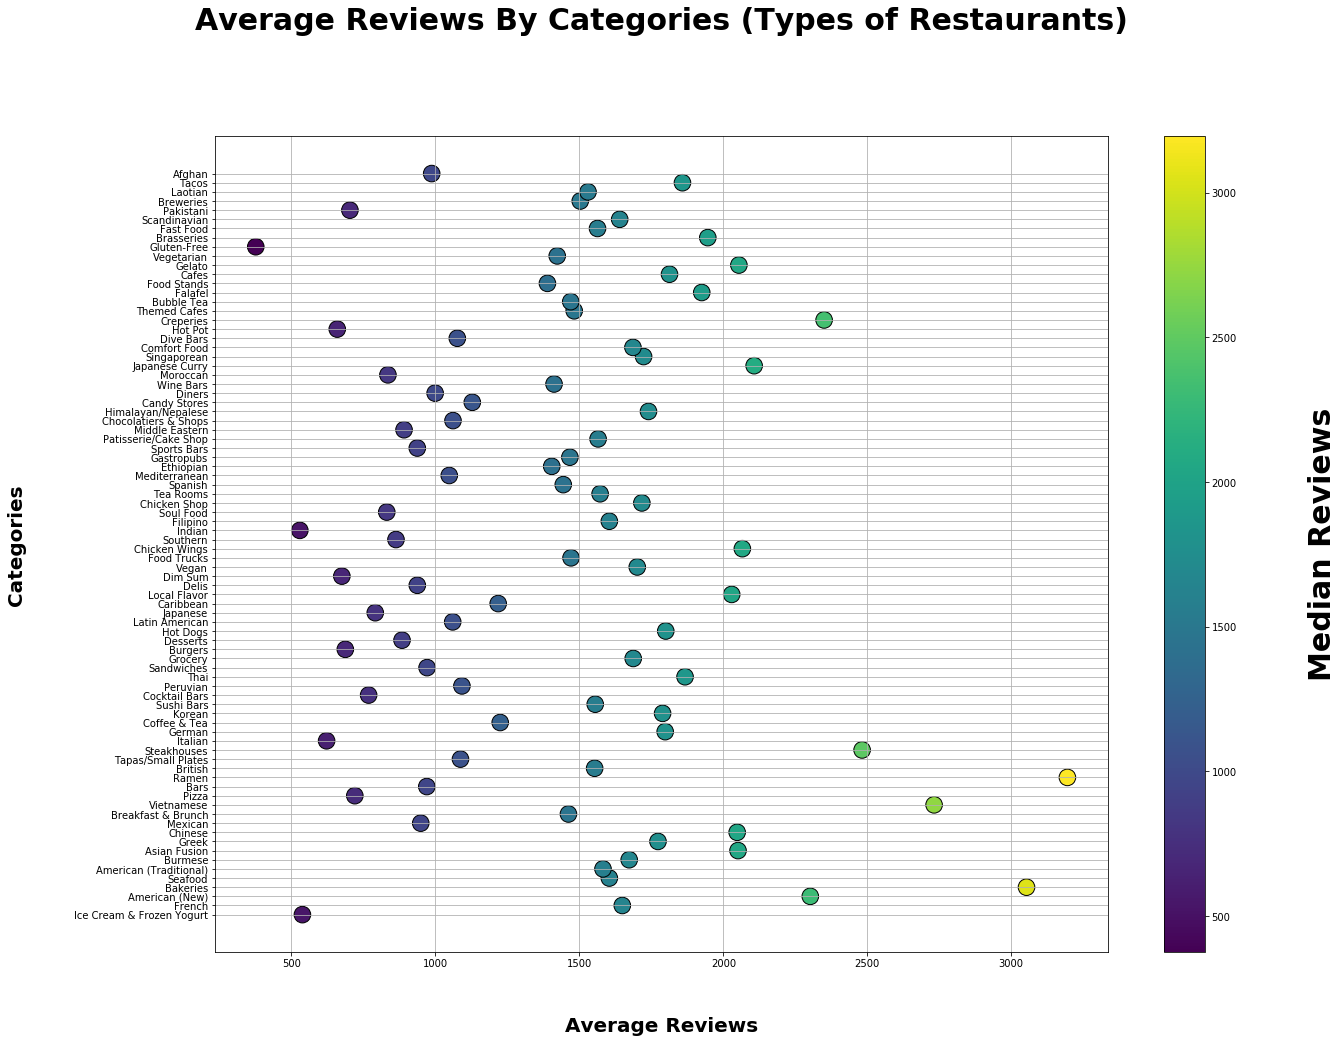

In [16]:
# Scatter Plot 

plt.figure(figsize=(20,15))

plt.scatter(west_bar_avg_review, x_axis, c=west_bar_avg_review, s=275, edgecolor="black")
clb = plt.colorbar()
plt.grid()


plt.xlabel("\n\nAverage Reviews", fontsize=20, weight="bold");
plt.ylabel("Categories\n\n", fontsize=20, weight="bold");
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=30, weight="bold");
clb.set_label("\n\nMedian Reviews", fontsize=30, weight="bold")

plt.savefig("plots/West_ScatterPlot_Average_Reviews_By_Categories.png")


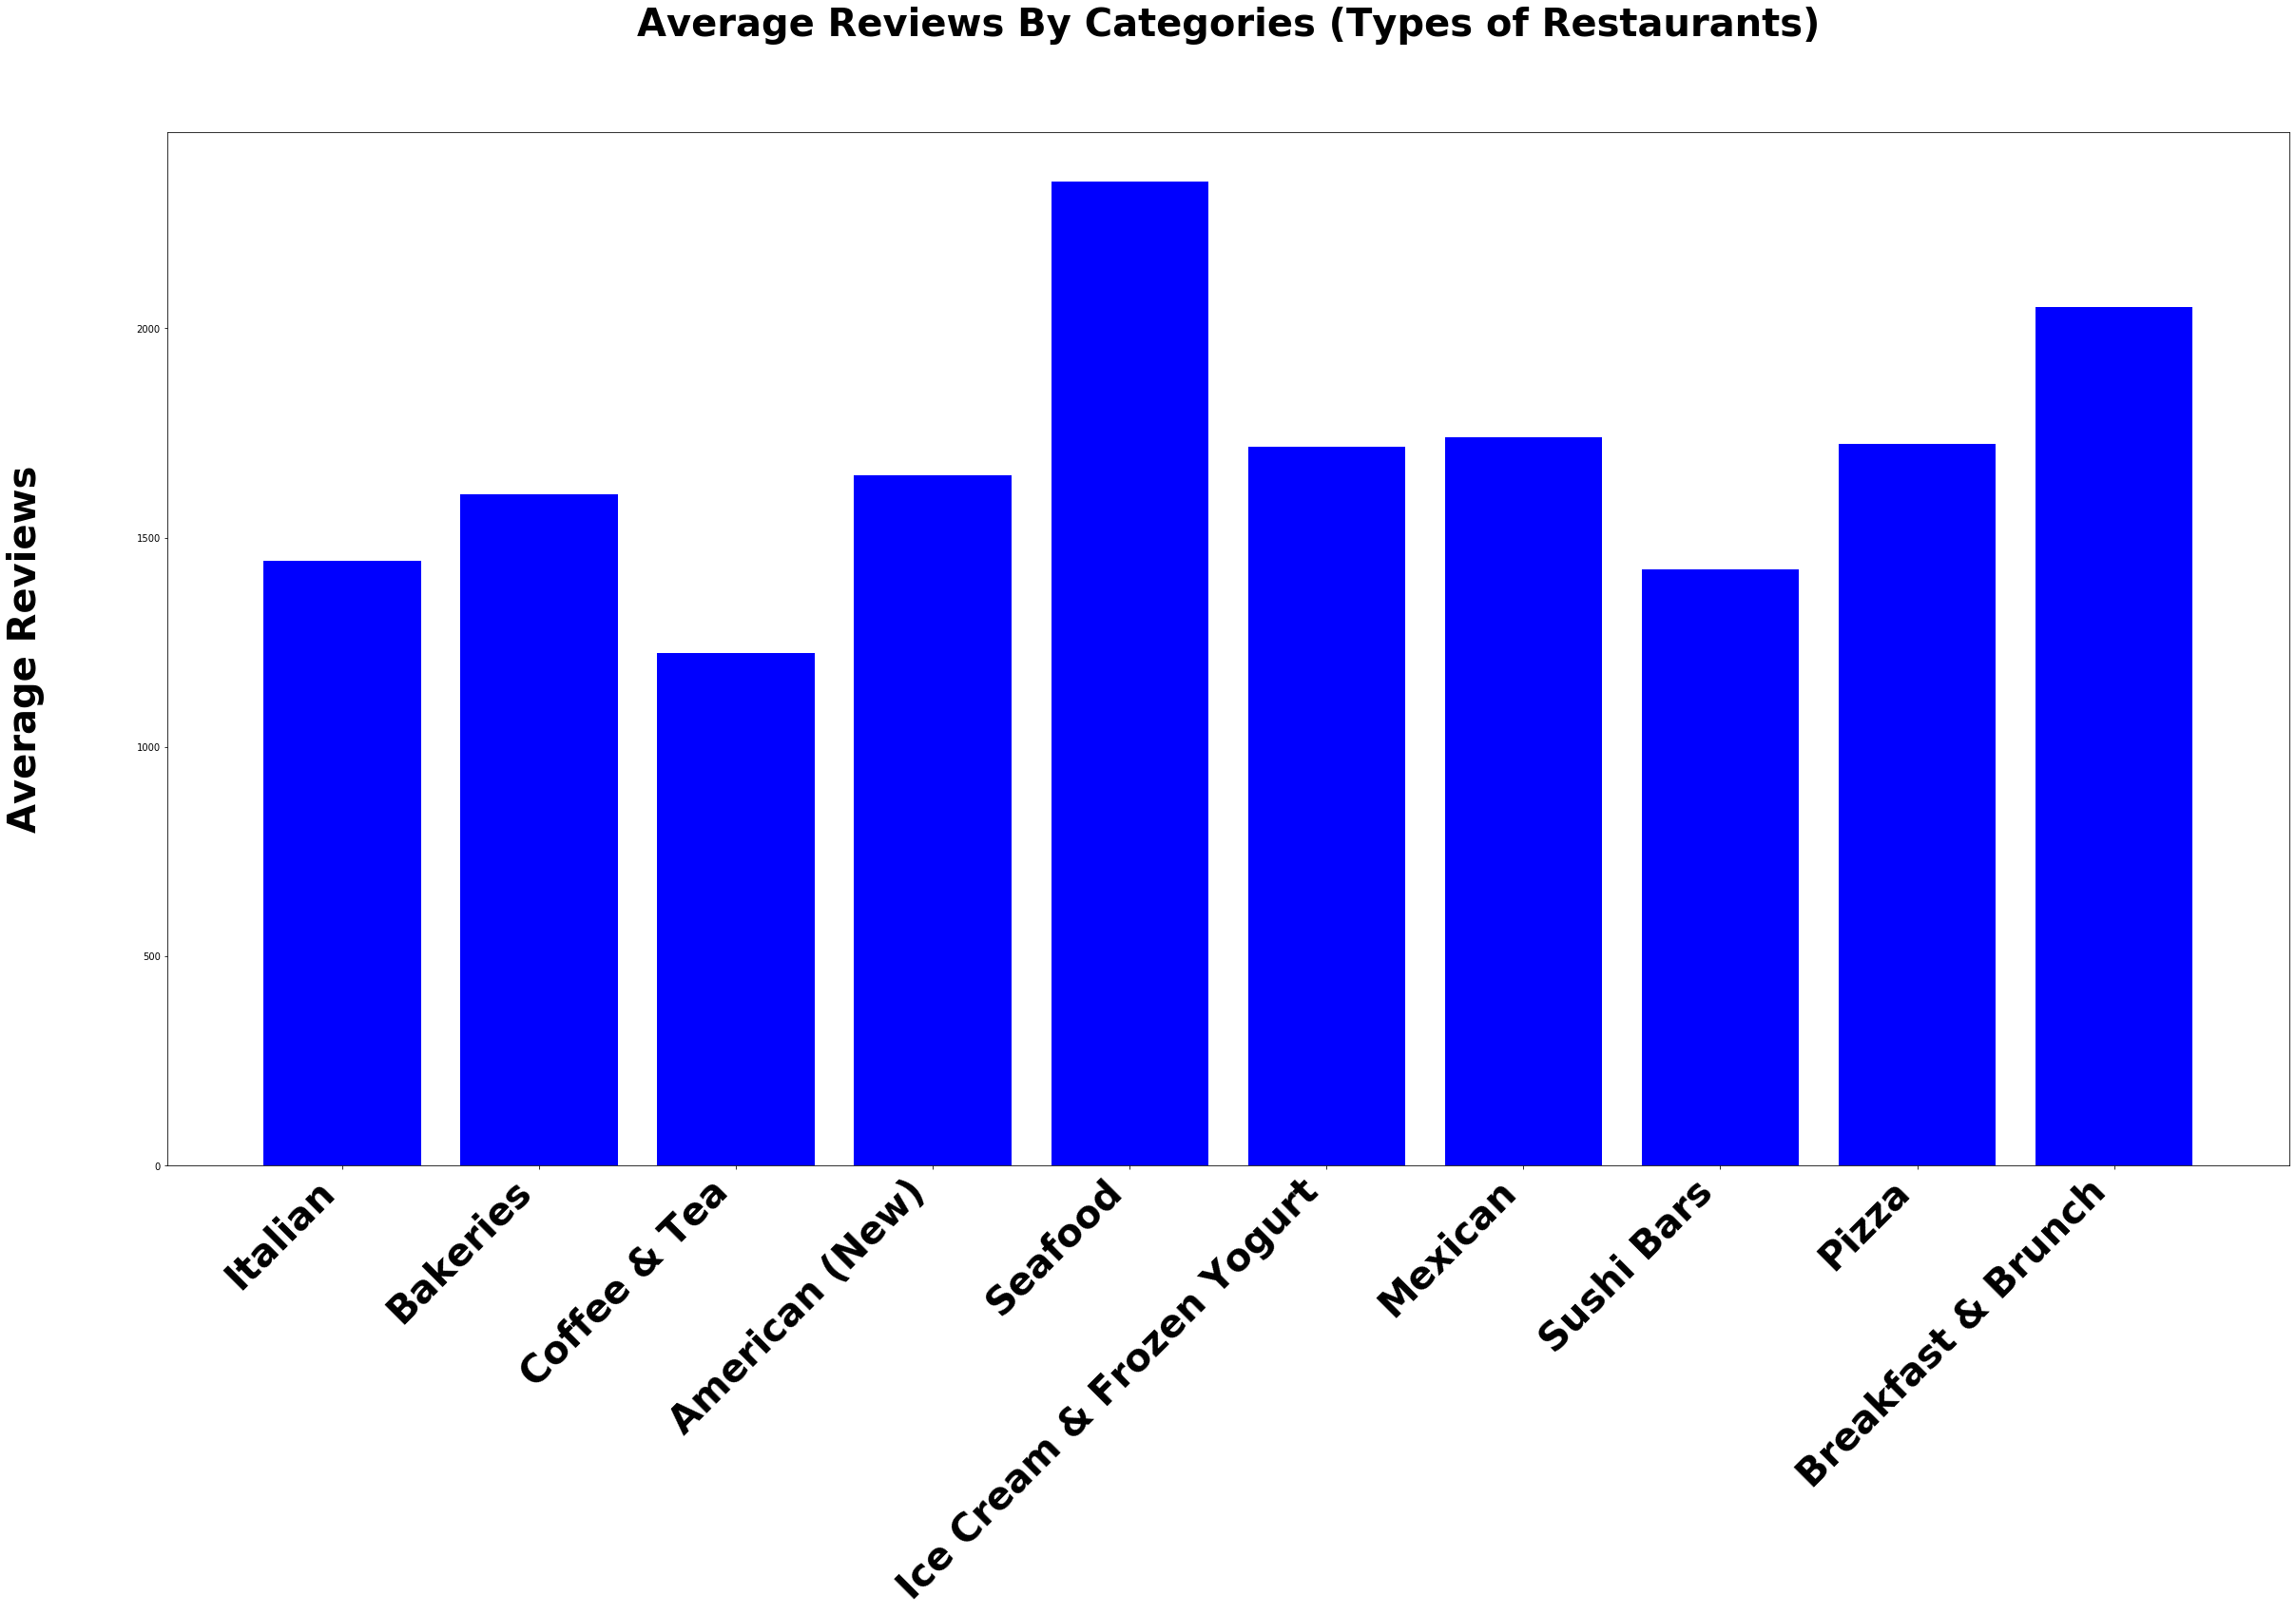

In [48]:
west_top_ten = pd.DataFrame(west_category_stats_df.sort_values(by='Number of Restaurants', ascending=False).head(10))
west_top_ten = west_top_ten.reset_index()
west_topten_unique = west_top_ten["Category"].unique()
# Bar Graph 
west_bar_topten = west_top_ten["Average # of Reviews per Restaurant"]
x_axis = west_topten_unique
plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, west_bar_topten, color='blue', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, west_topten_unique, rotation=45, weight="bold", fontsize=40, ha='right');

# plt.xlim(-0.75, len(x_axis));
# plt.ylim(0, max(east_bar_avg_review)+100);
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n", fontsize=40, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=40);
# plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=40);
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/Top_Ten_West_BarGraph_Average_Reviews_By_Categories.png")


In [20]:
# need a location variable to plot heatmap
california_coordinates = west_data[["Latitude", "Longitude"]]
#california_coordinates vs review ratings
weights = west_data["Reviews"].astype(float)
# Heatmap 
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(california_coordinates, weights=weights,
                                   max_intensity=100,
                                   point_radius=10)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# South Region Breakdown

In [21]:
#Austin, Texas Group By
grouped_south_df = south_data.groupby('Category')
#counts the total of each category within the column
total_south_category = grouped_south_df['Category'].count()
#gets the average amount of reviews by category
south_price_avg = grouped_south_df['Price'].mean()
south_review_counts = grouped_south_df['Reviews'].mean()
south_review_counts.head()
#avg star rating
south_rating_counts = grouped_south_df['Rating'].mean()
#This will populate an array of all categories in Sample.
south_category_unique = south_data["Category"].unique()
south_category_unique #105 unique categories
south_total_categories = len(south_category_unique)
south_category_stats_df= pd.DataFrame({
    "Number of Restaurants": total_south_category,
    "Average Price of Category": south_price_avg.round(2),
    "Average # of Reviews per Restaurant": south_review_counts.astype(int),
    "Percentage of Ratings": south_rating_counts.round(2)
})
south_category_stats_df.head()

,Number of Restaurants,Average Price of Category,Average # of Reviews per Restaurant,Percentage of Ratings
Category,,,,
American (New),27,2.26,636,4.13
American (Traditional),17,1.94,709,4.00
Argentine,1,2.00,616,4.00
Asian Fusion,10,1.60,529,4.25
Bagels,2,1.00,460,4.50


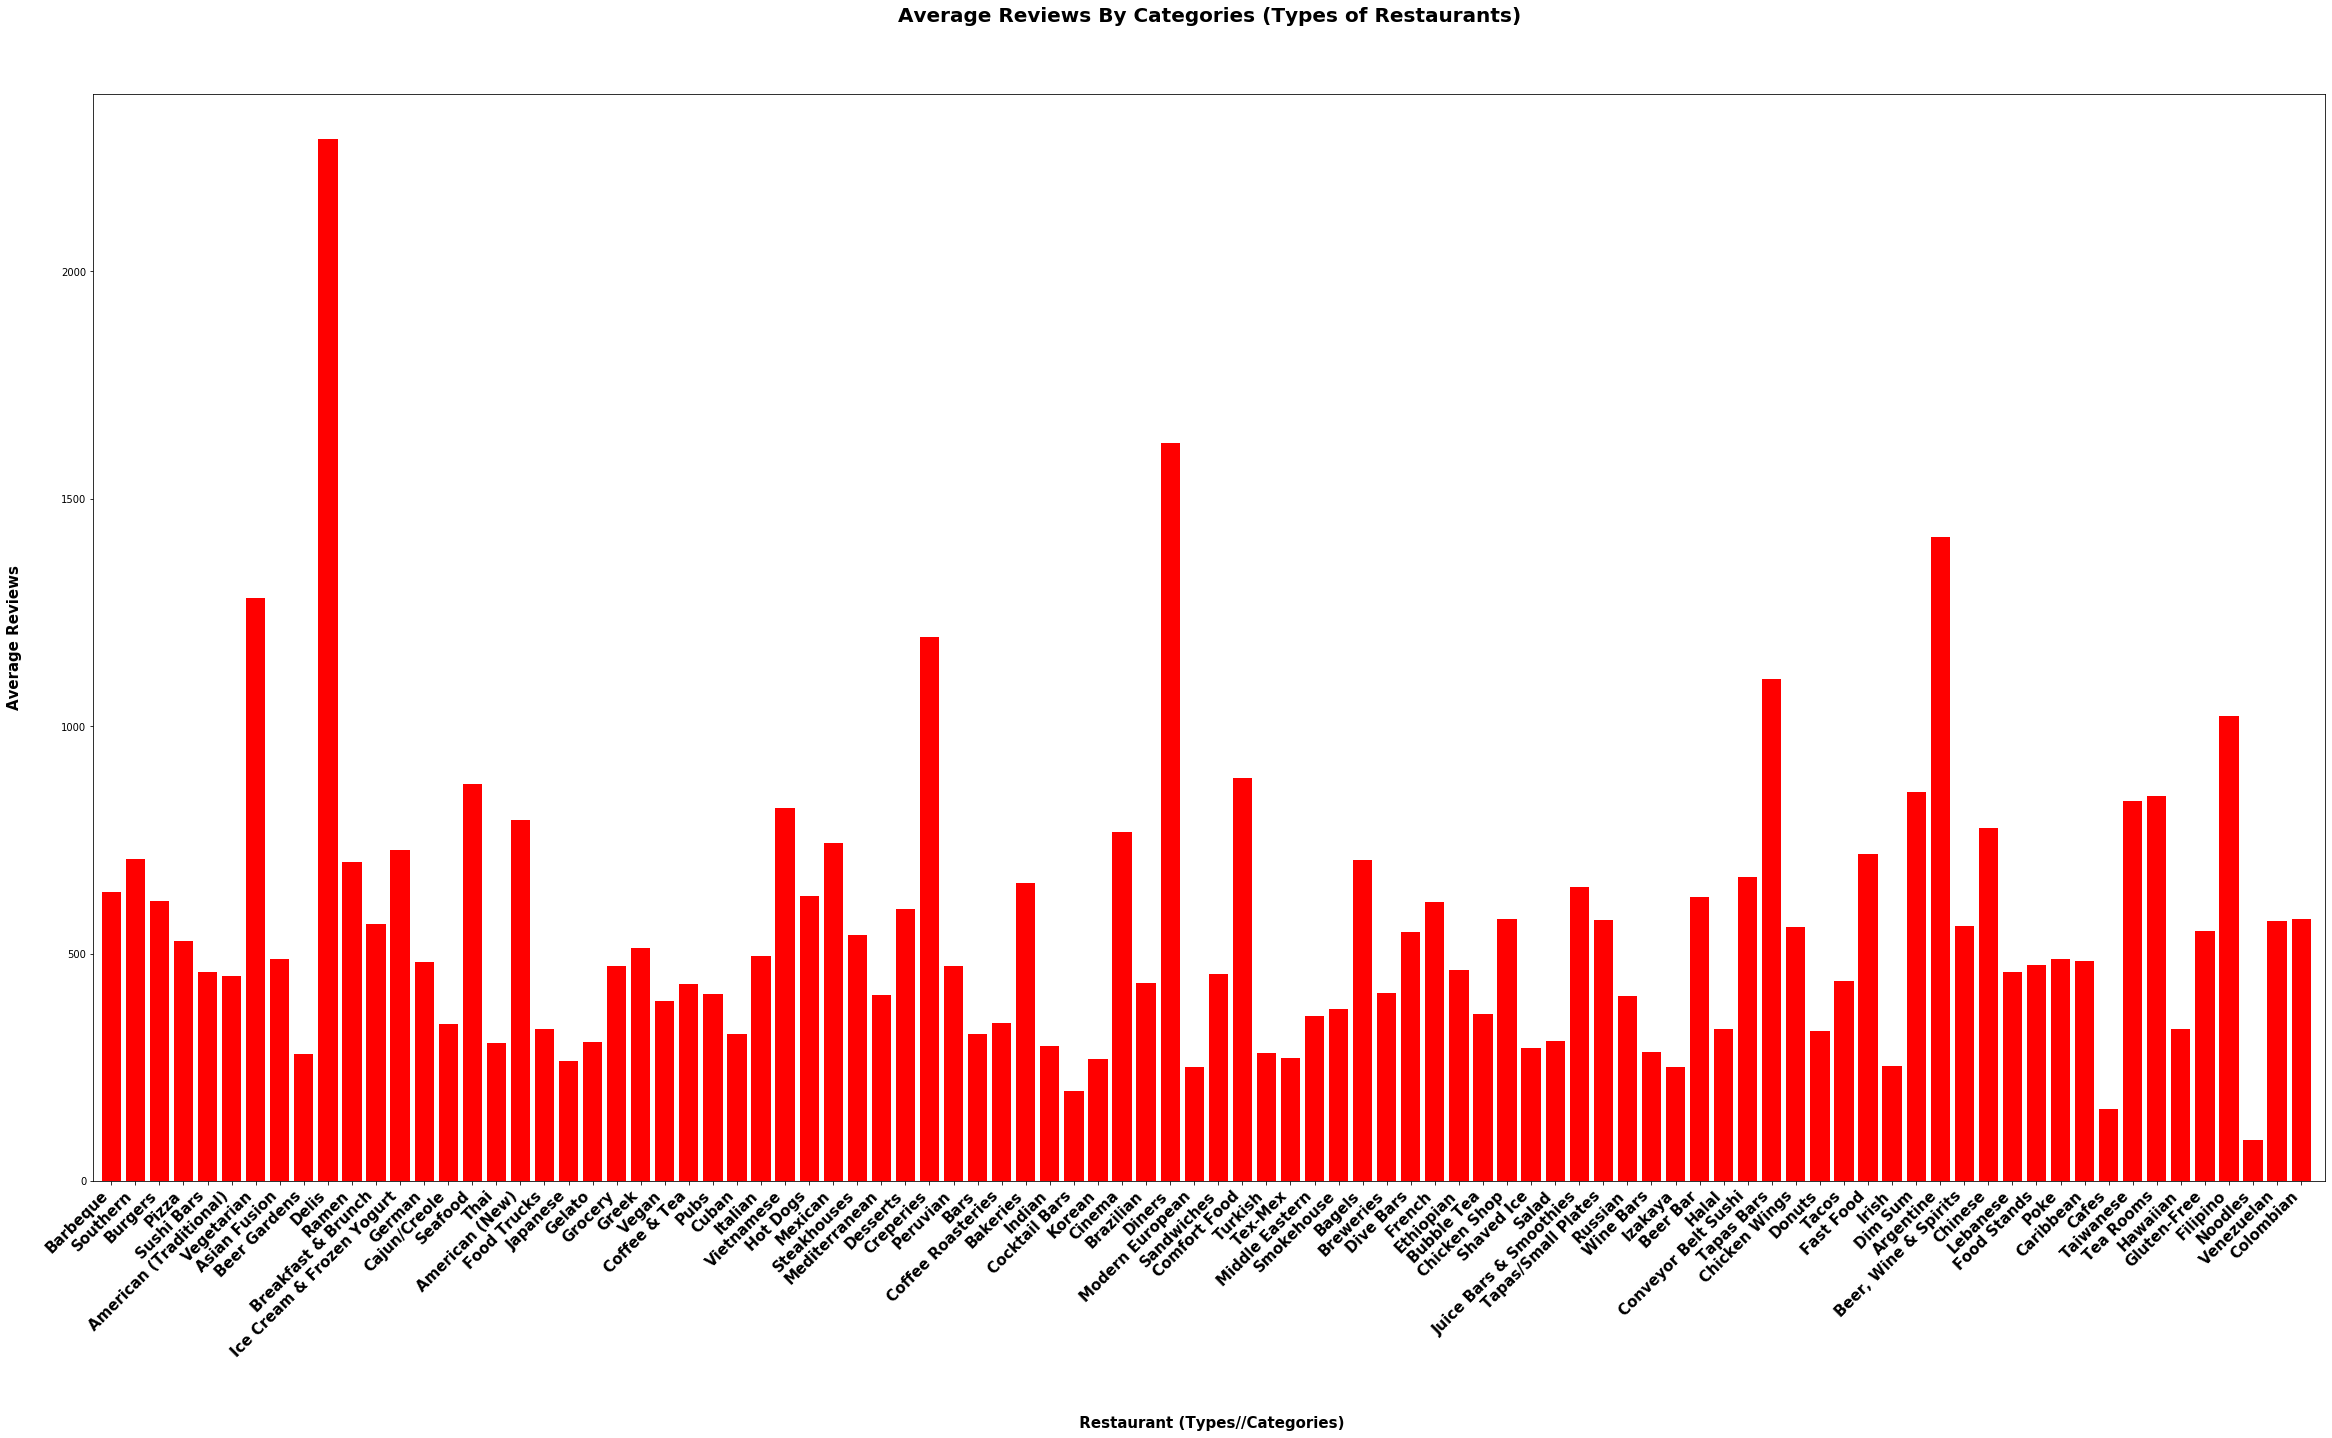

In [23]:
# Bar Graph 

south_bar_avg_review = south_category_stats_df["Average # of Reviews per Restaurant"]
x_axis = south_category_unique # len is = 28
# x_axis

plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, south_bar_avg_review, color='red', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, south_category_unique, rotation=45, weight="bold", fontsize=15, ha='right');

plt.xlim(-0.75, len(x_axis));
plt.ylim(0, max(south_bar_avg_review)+100);

# threshold = 4000
# above_threshold = np.maximum(bar_avg_review - threshold, 0)
# below_threshold = np.minimum(bar_avg_review, threshold)
# fig, ax = plt.subplots()
# ax.bar(x_axis, below_threshold, 0.35, color="g")
# ax.bar(x_axis, above_threshold, 0.35, color="r",
#         bottom=below_threshold)
# ax.plot([-0.75, 30], [threshold, threshold], "k--")

plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=20, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=15);
plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=15);


# axhline -  adding a line that represents a good threshold
# 1000 being a good standard average 
# 3000 + being above average
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/South_BarGraph_Average_Reviews_By_Categories.png")

# print("MEAN")
# print(bar_avg_review.mean())
# print("MEDIAN")
# print(bar_avg_review.median())
# print("MODE")
# print(bar_avg_review.mode())

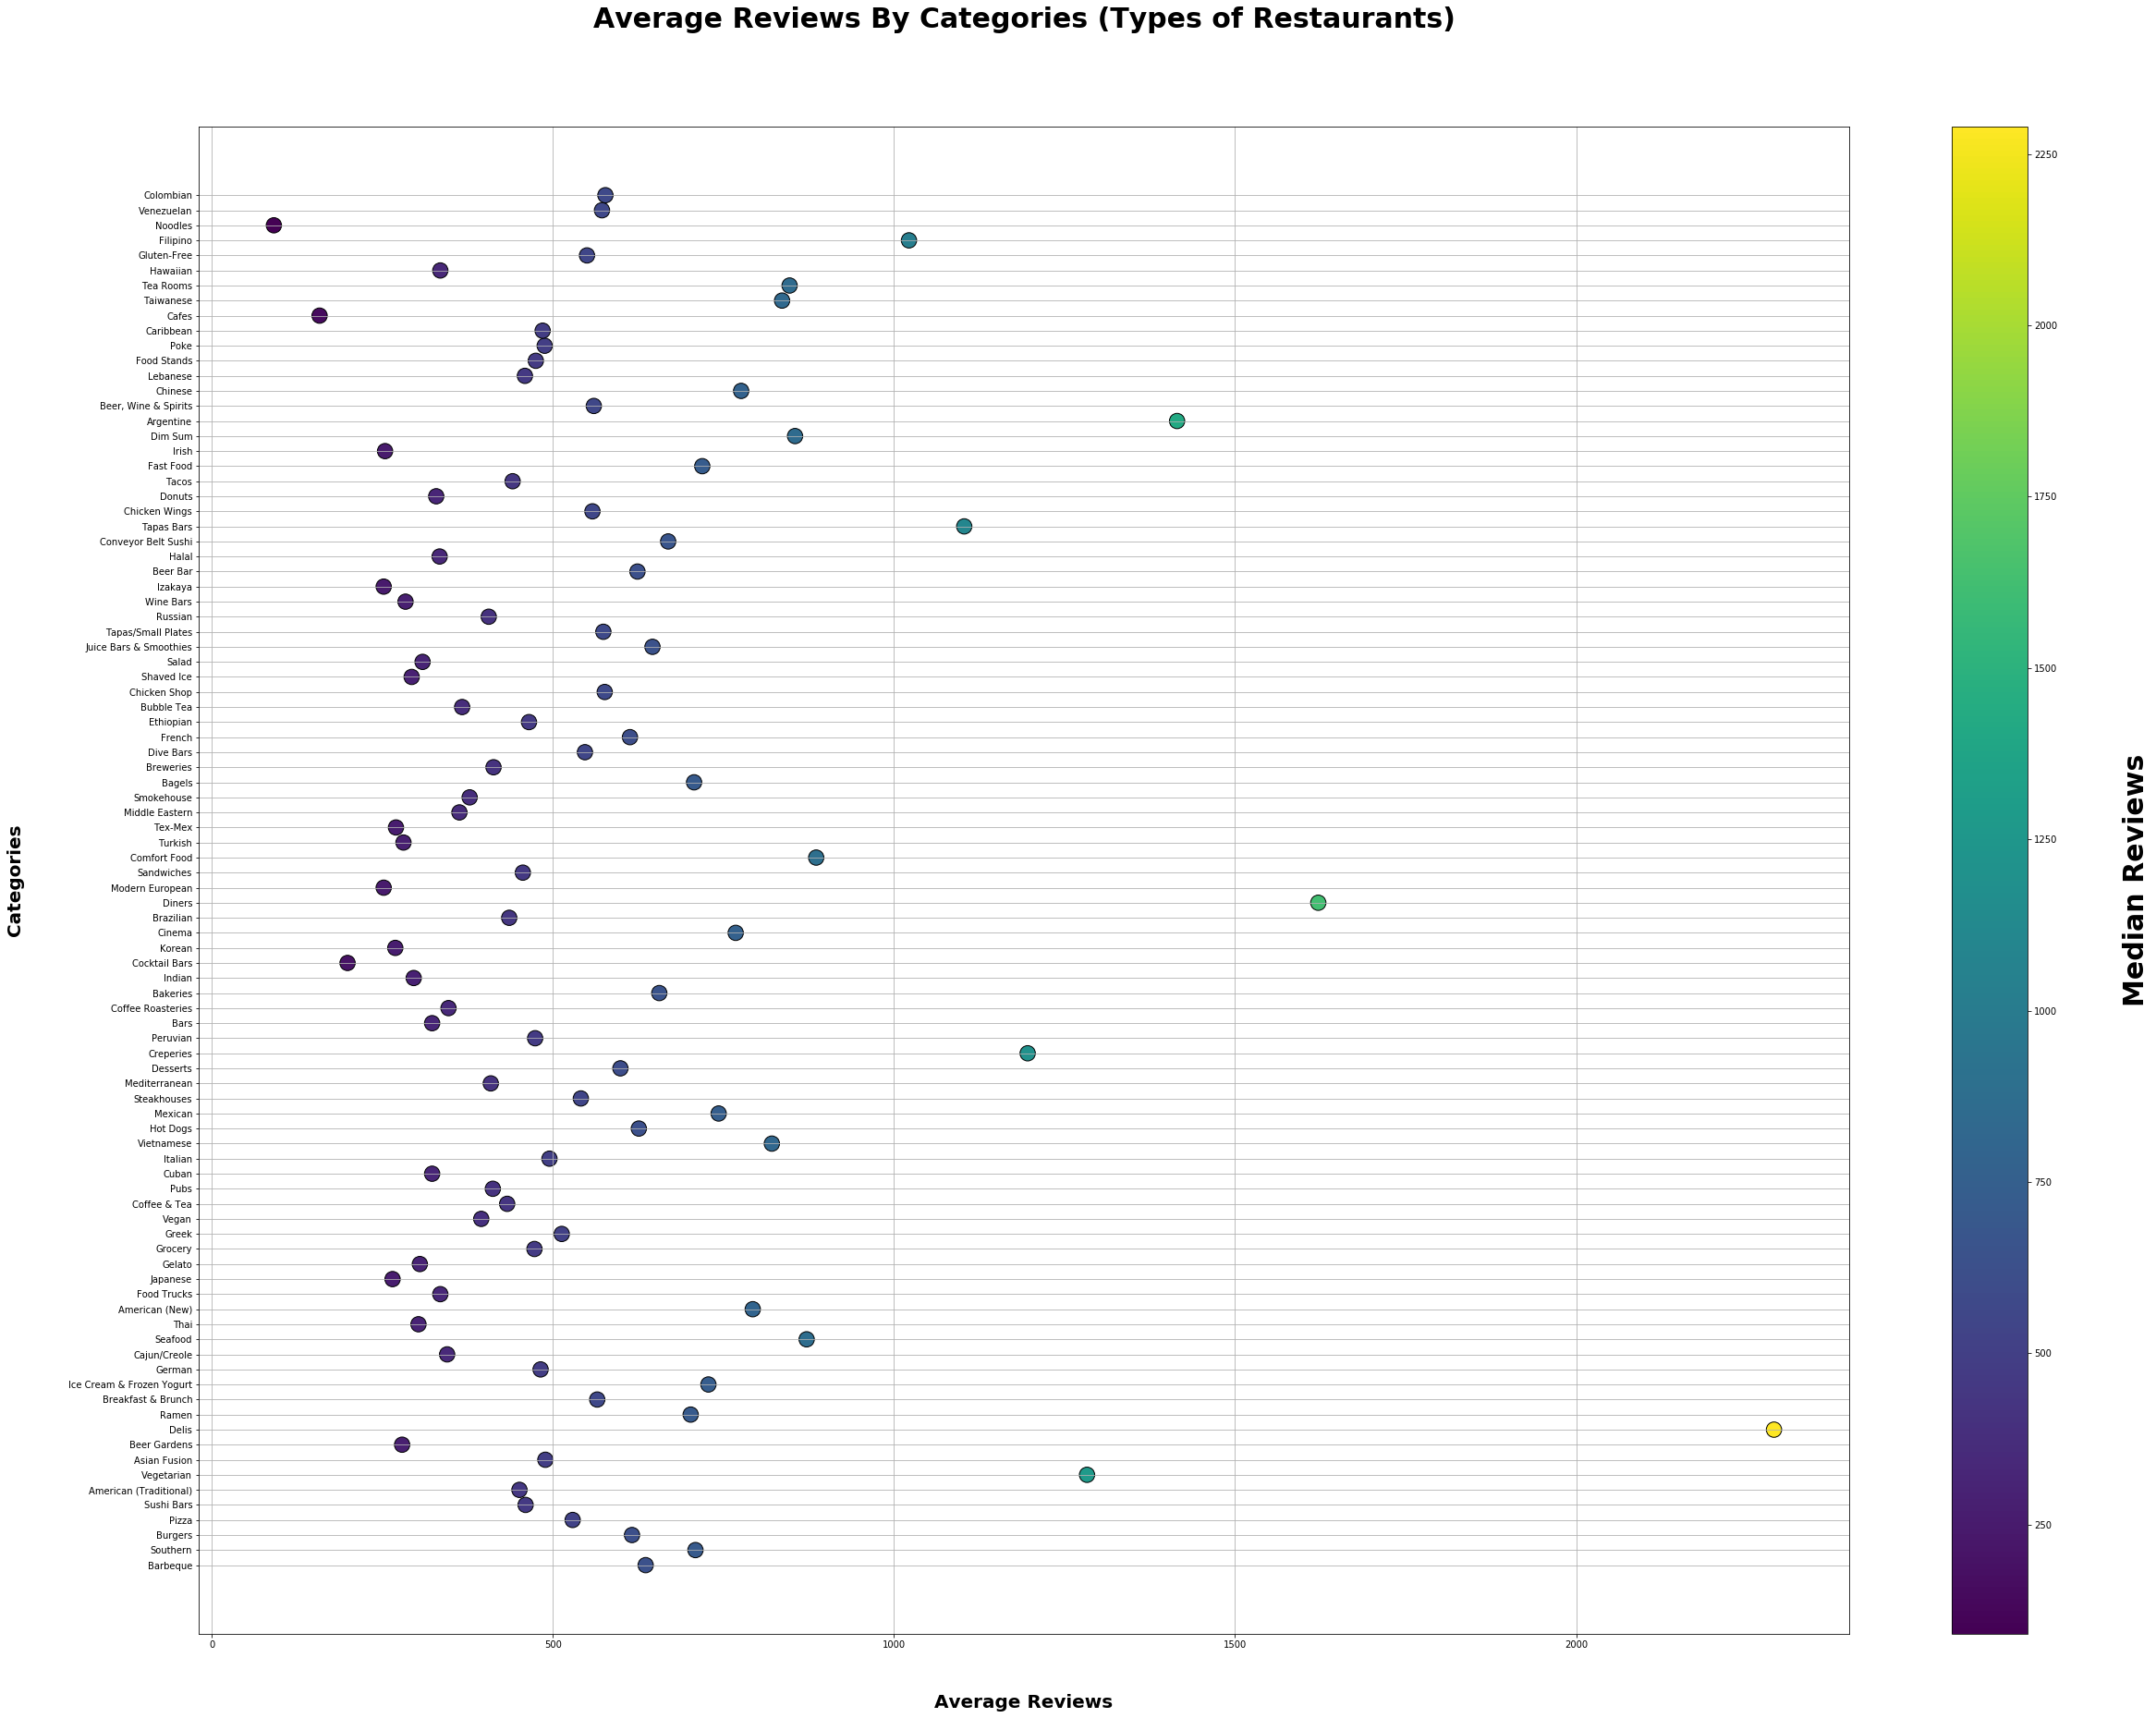

In [24]:
# Scatter Plot 

plt.figure(figsize=(40,30))

plt.scatter(south_bar_avg_review, x_axis, c=south_bar_avg_review, s=275, edgecolor="black")
clb = plt.colorbar()
plt.grid()


plt.xlabel("\n\nAverage Reviews", fontsize=20, weight="bold");
plt.ylabel("Categories\n\n", fontsize=20, weight="bold");
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=30, weight="bold");
clb.set_label("\n\nMedian Reviews", fontsize=30, weight="bold")

plt.savefig("plots/South_ScatterPlot_Average_Reviews_By_Categories.png")

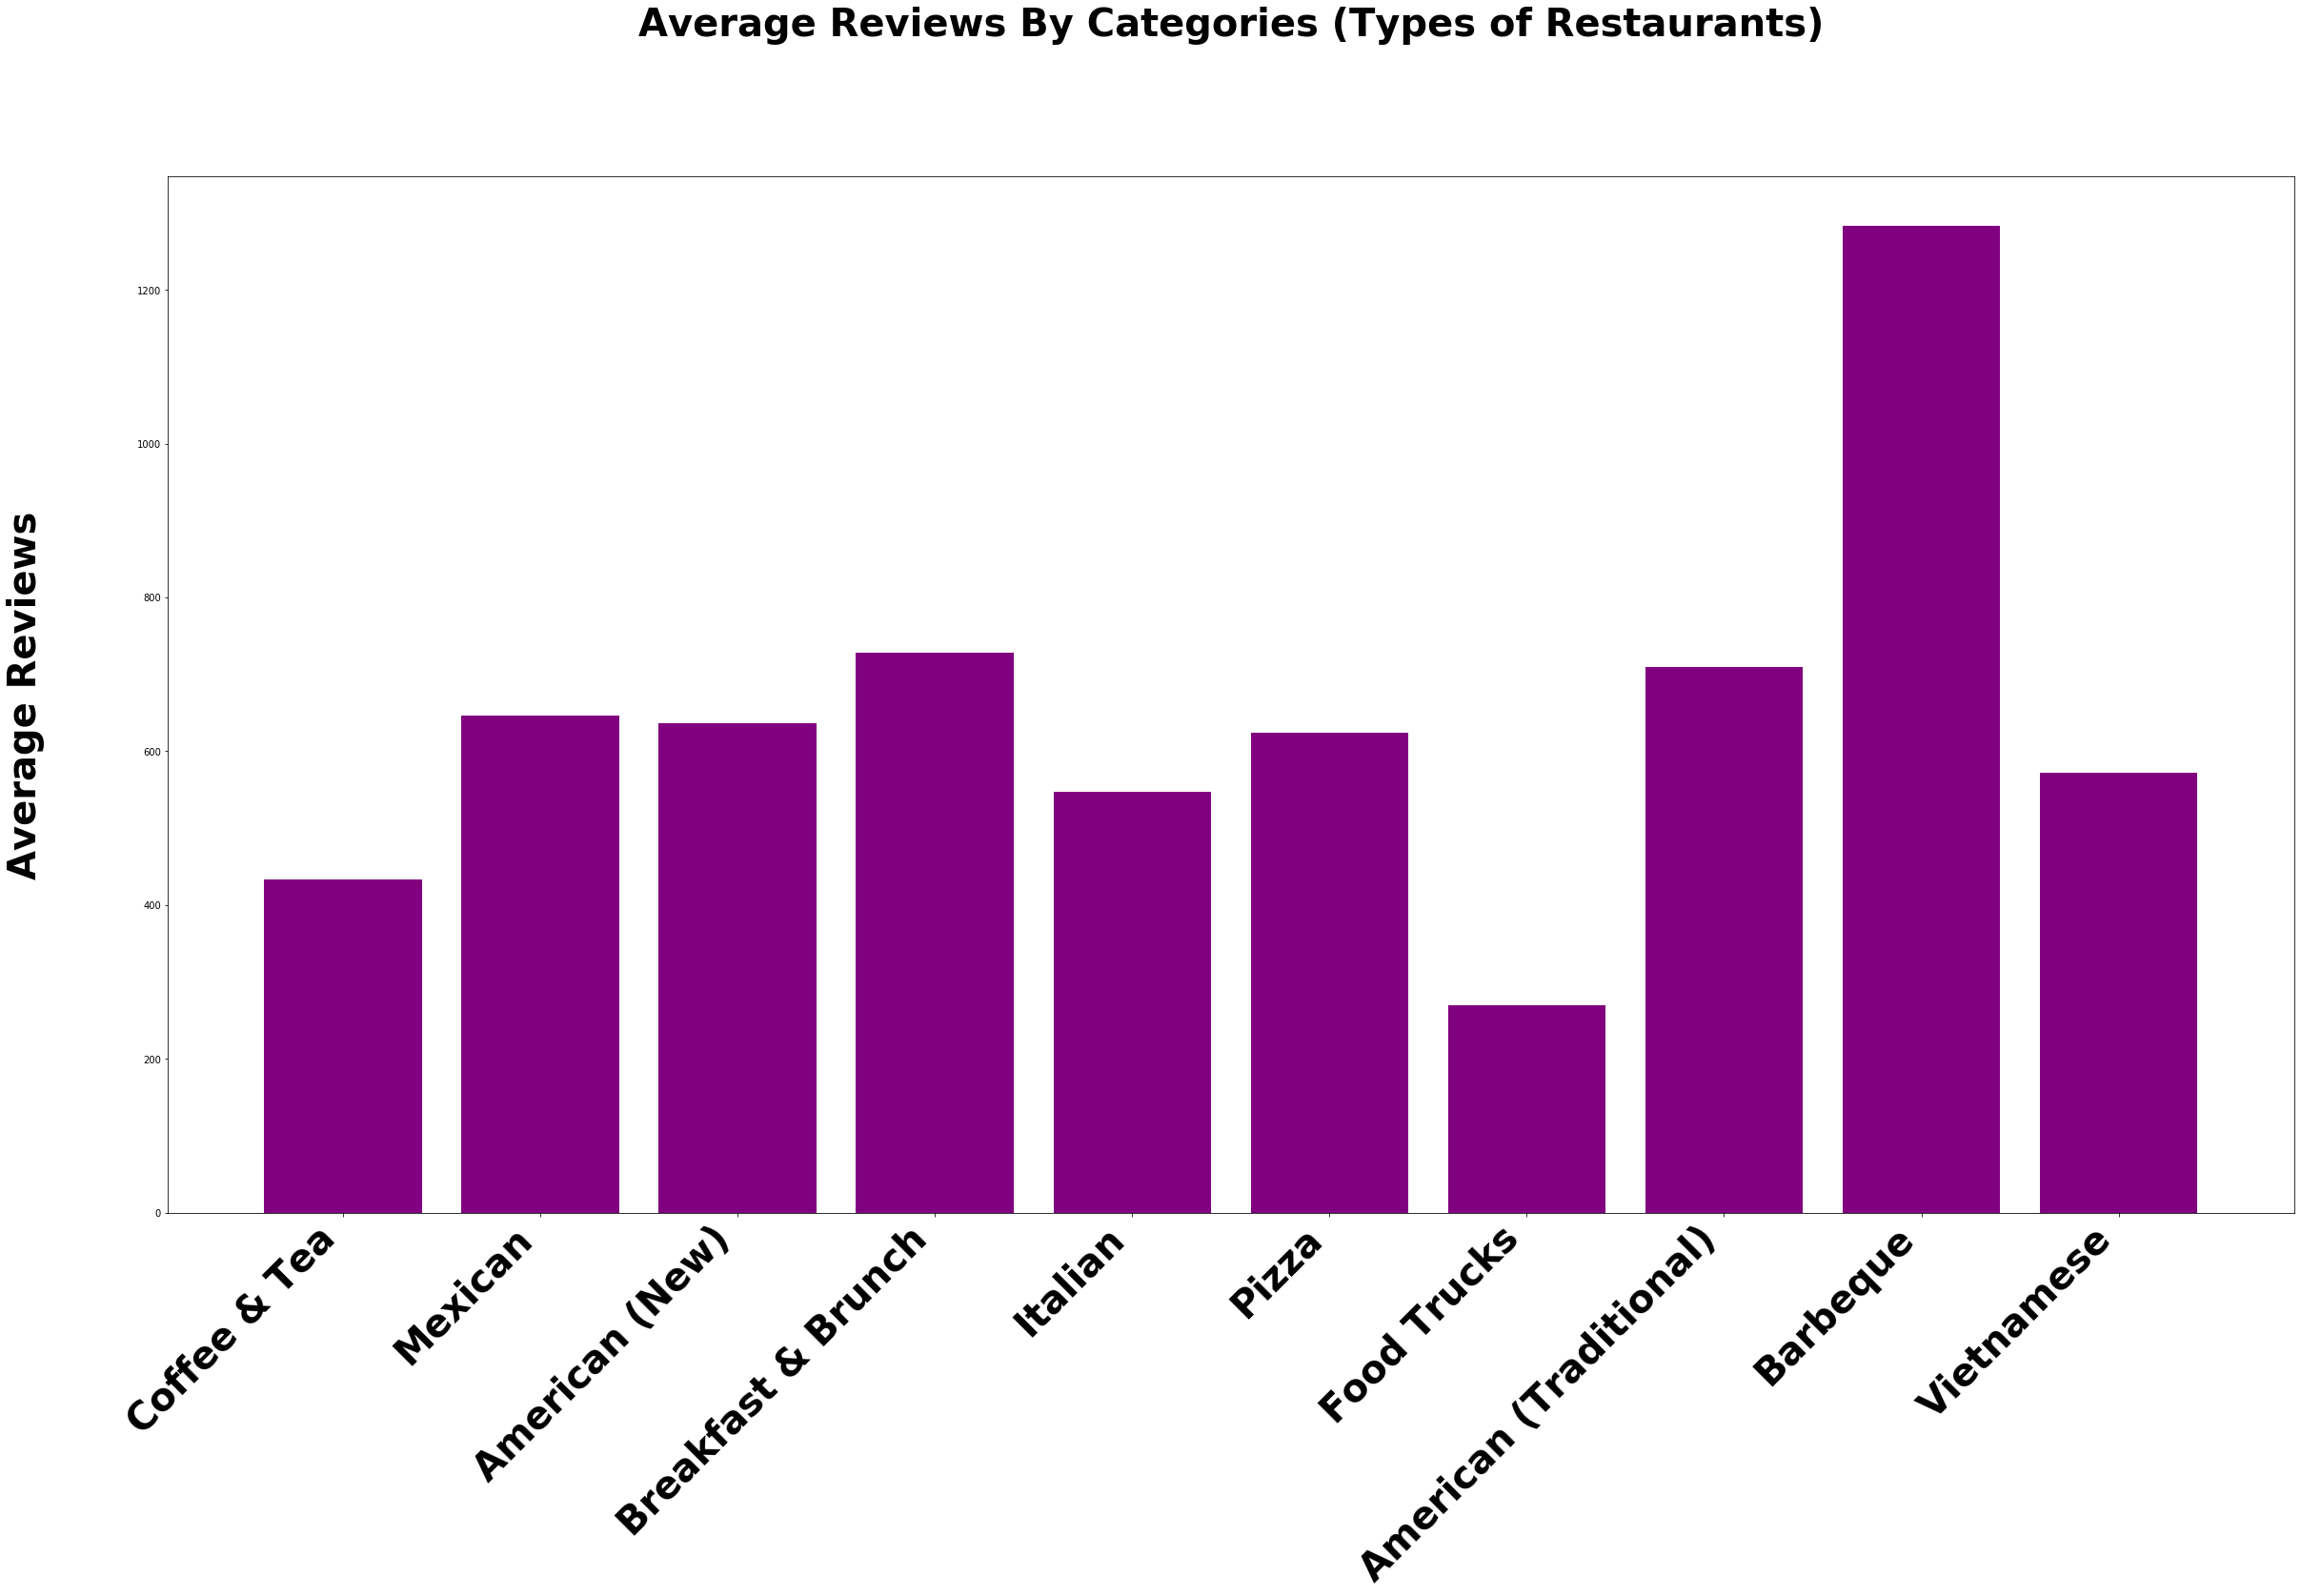

In [43]:
south_top_ten = pd.DataFrame(south_category_stats_df.sort_values(by='Number of Restaurants', ascending=False).head(10))
south_top_ten = south_top_ten.reset_index()
south_topten_unique = south_top_ten["Category"].unique()
# Bar Graph 
south_bar_topten = south_top_ten["Average # of Reviews per Restaurant"]
x_axis = south_topten_unique
plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, south_bar_topten, color='purple', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, south_topten_unique, rotation=45, weight="bold", fontsize=40, ha='right');

# plt.xlim(-0.75, len(x_axis));
# plt.ylim(0, max(east_bar_avg_review)+100);
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=40, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=40);
plt.savefig("plots/Top_Ten_South_BarGraph_Average_Reviews_By_Categories.png")

In [29]:
# need a location variable to plot heatmap
texas_coordinates = south_data[["Latitude", "Longitude"]]
# texas_coordinates
weights = south_data["Reviews"].astype(float)
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(texas_coordinates, weights=weights,
                                   max_intensity=100,
                                   point_radius=10)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# North Breakdown - Chicago

In [30]:
#Chicago
grouped_north_df = north_data.groupby('Category')
#counts the total of each category within the column
total_north_category = grouped_north_df['Category'].count()
#gets the average amount of reviews by category
north_price_avg = grouped_north_df['Price'].mean()
north_review_counts = grouped_north_df['Reviews'].mean()
north_review_counts.head()
#avg star rating
north_rating_counts = grouped_north_df['Rating'].mean()
#This will populate an array of all categories in Sample.
north_category_unique = north_data["Category"].unique()
north_category_unique #117 Unique Categories of Food
north_total_categories = len(north_category_unique)
north_category_stats_df= pd.DataFrame({
    "Number of Restaurants": total_north_category,
    "Average Price of Category": north_price_avg.round(2),
    "Average # of Reviews per Restaurant": north_review_counts.astype(int),
    "Percentage of Ratings": north_rating_counts.round(2)
})
north_category_stats_df.head()

,Number of Restaurants,Average Price of Category,Average # of Reviews per Restaurant,Percentage of Ratings
Category,,,,
American (New),56,2.50,1079,4.18
American (Traditional),21,2.19,948,4.00
Aquariums,1,1.00,1755,3.50
Argentine,2,2.00,473,4.25
Asian Fusion,8,2.25,1152,4.25


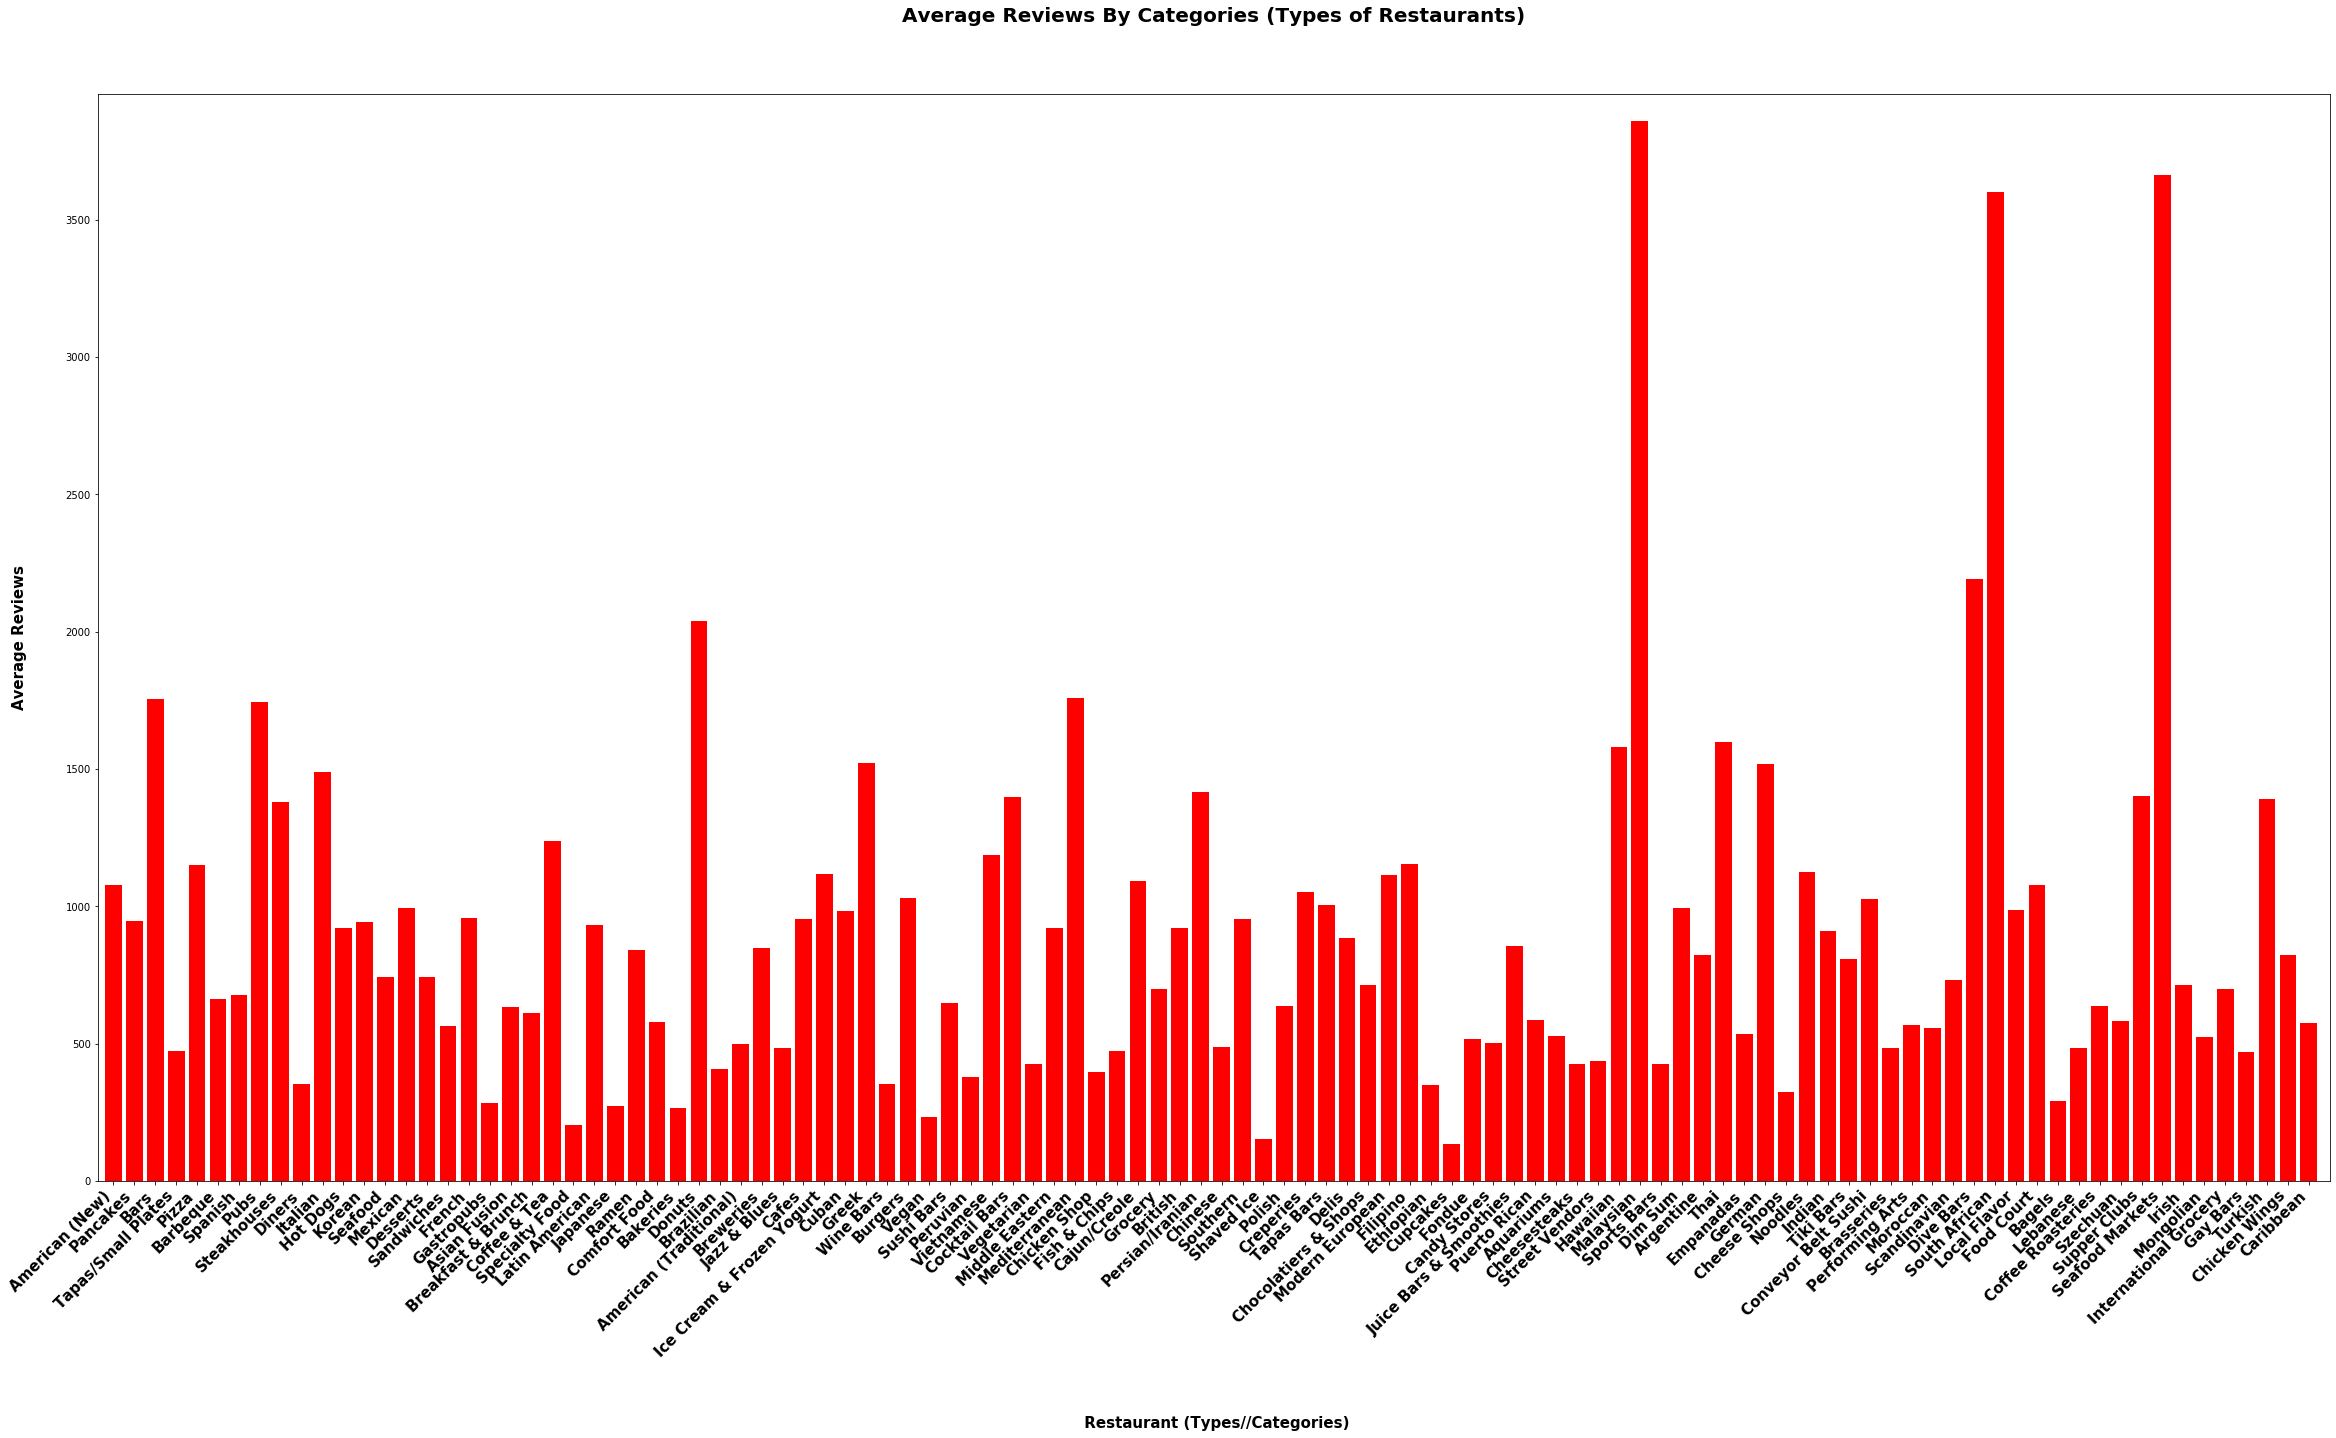

In [31]:
# Bar Graph 

north_bar_avg_review = north_category_stats_df["Average # of Reviews per Restaurant"]
x_axis = north_category_unique # len is = 28
# x_axis

plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, north_bar_avg_review, color='red', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, north_category_unique, rotation=45, weight="bold", fontsize=15, ha='right');

plt.xlim(-0.75, len(x_axis));
plt.ylim(0, max(north_bar_avg_review)+100);

# threshold = 4000
# above_threshold = np.maximum(bar_avg_review - threshold, 0)
# below_threshold = np.minimum(bar_avg_review, threshold)
# fig, ax = plt.subplots()
# ax.bar(x_axis, below_threshold, 0.35, color="g")
# ax.bar(x_axis, above_threshold, 0.35, color="r",
#         bottom=below_threshold)
# ax.plot([-0.75, 30], [threshold, threshold], "k--")

plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=20, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=15);
plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=15);


# axhline -  adding a line that represents a good threshold
# 1000 being a good standard average 
# 3000 + being above average
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/North_BarGraph_Average_Reviews_By_Categories.png")

# print("MEAN")
# print(bar_avg_review.mean())
# print("MEDIAN")
# print(bar_avg_review.median())
# print("MODE")
# print(bar_avg_review.mode())

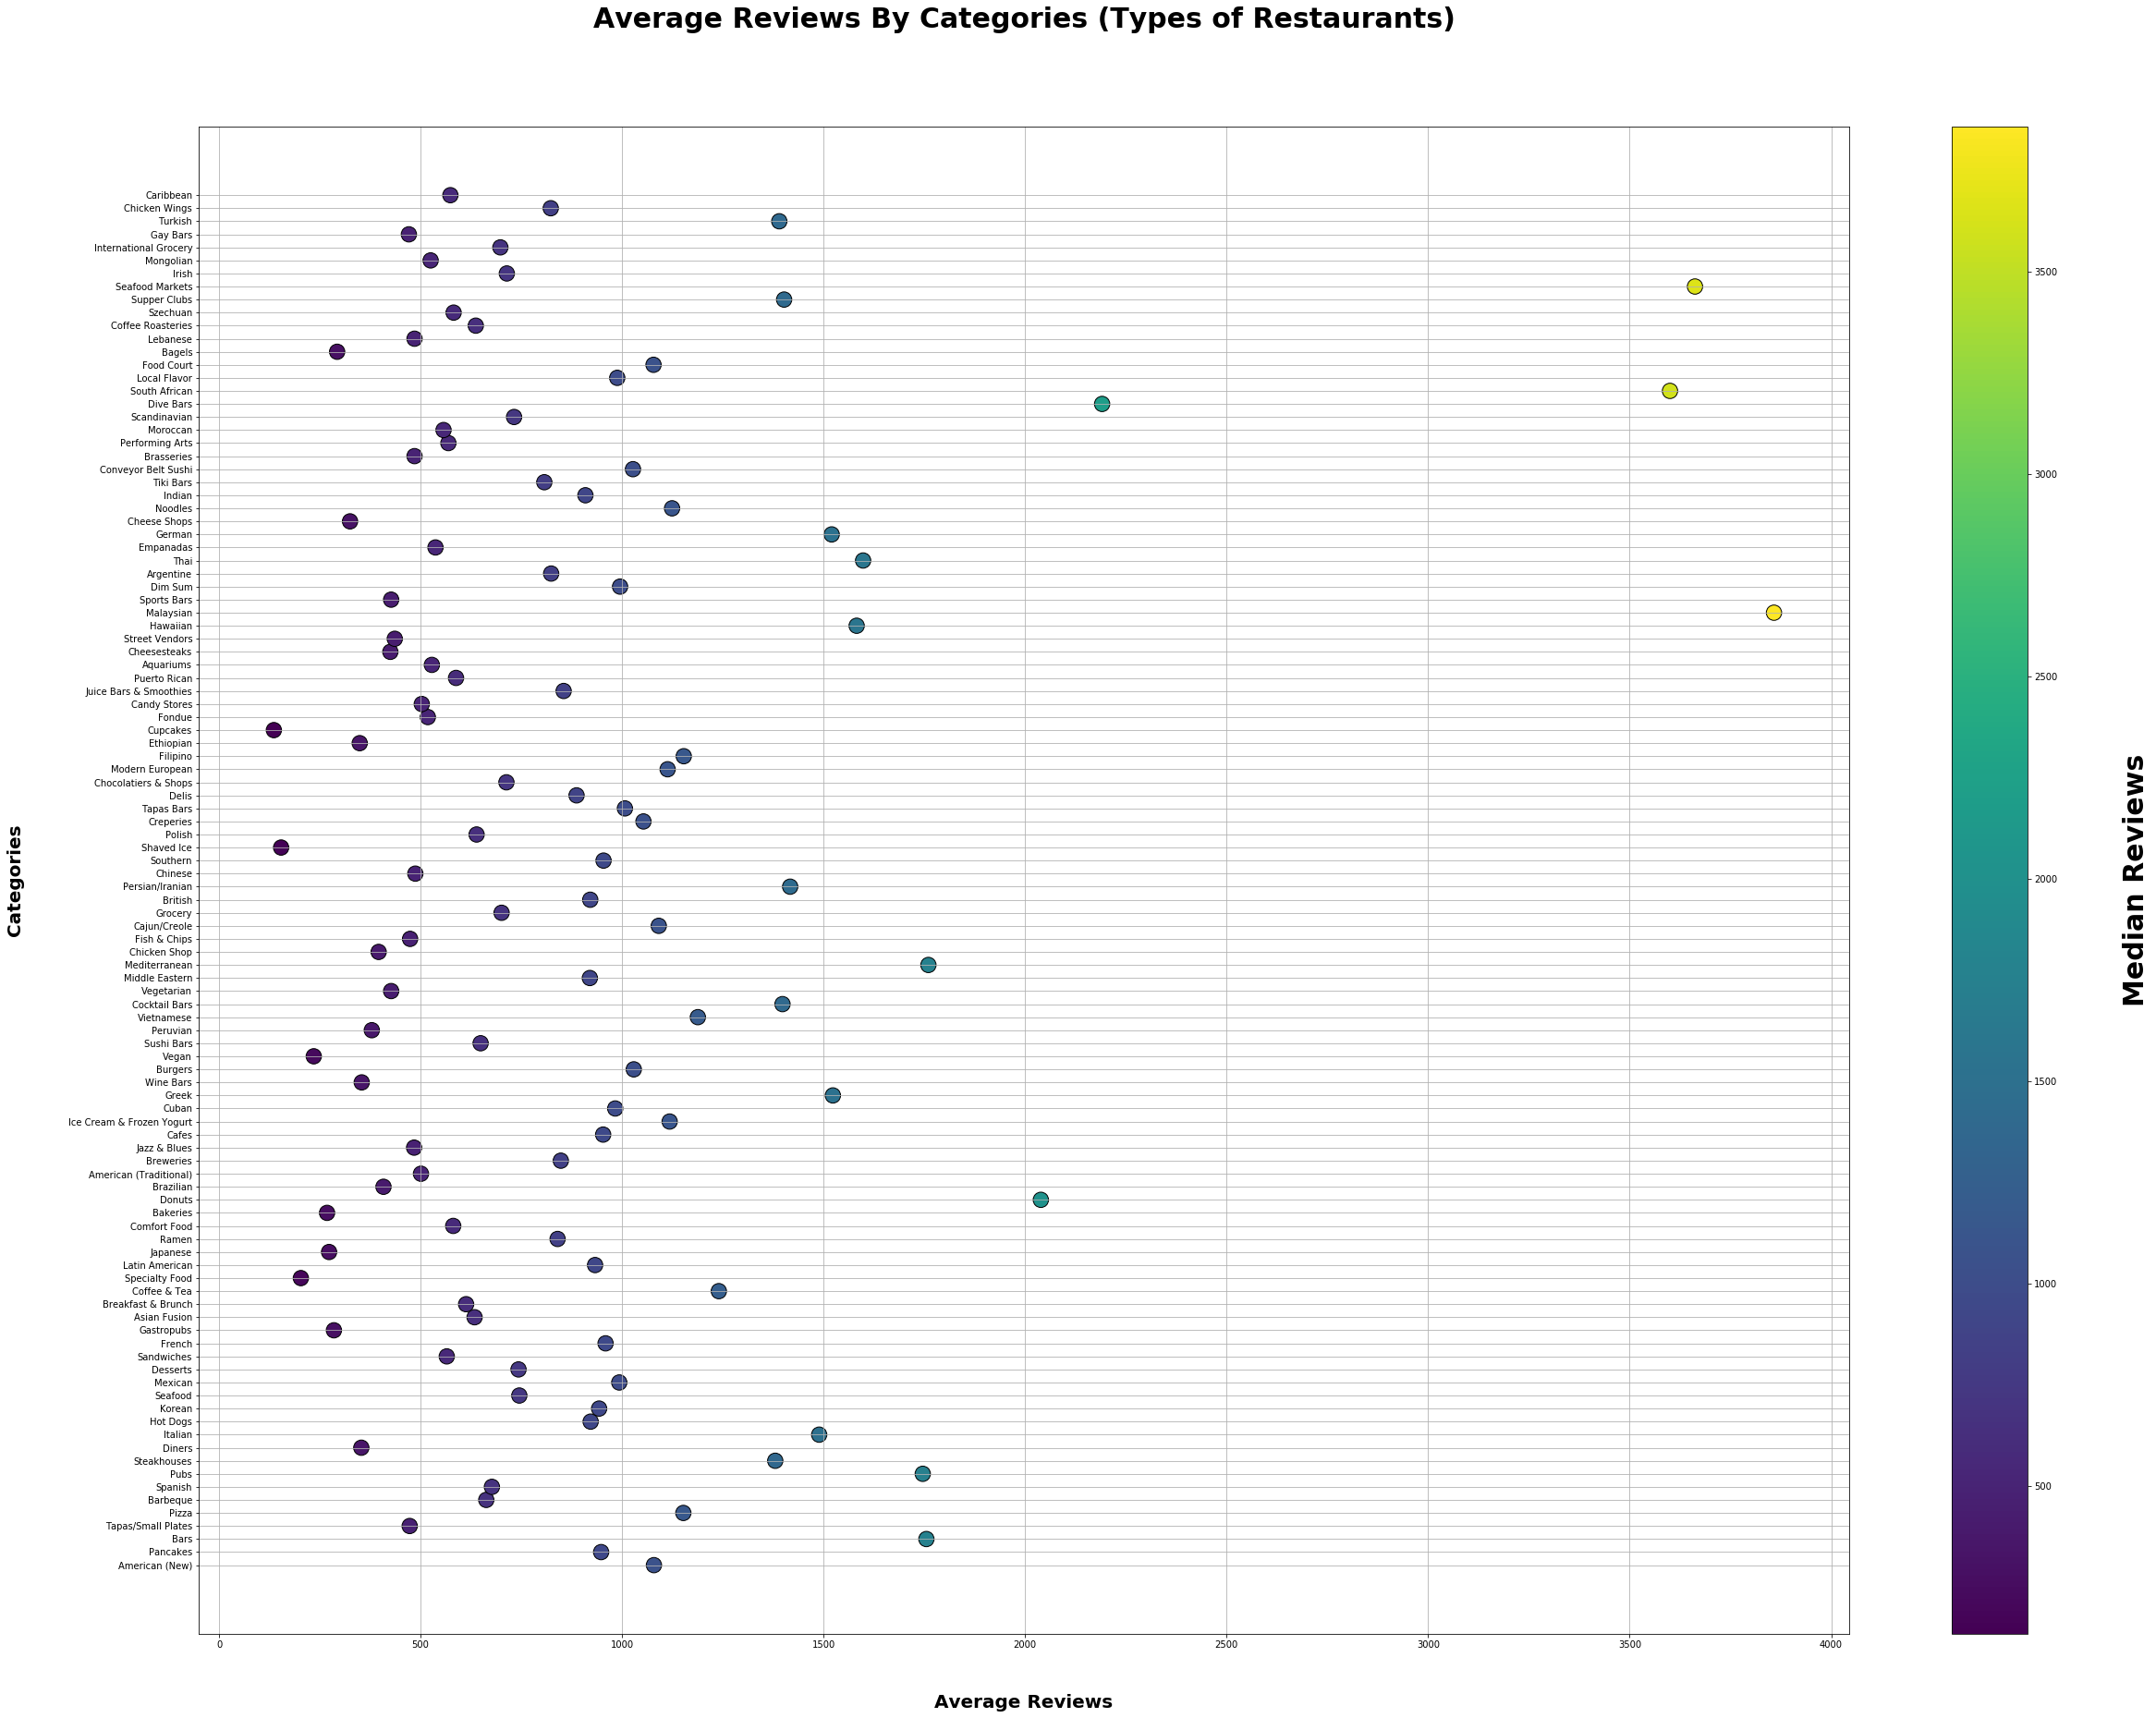

In [32]:
# Scatter Plot 

plt.figure(figsize=(40,30))

plt.scatter(north_bar_avg_review, x_axis, c=north_bar_avg_review, s=275, edgecolor="black")
clb = plt.colorbar()
plt.grid()


plt.xlabel("\n\nAverage Reviews", fontsize=20, weight="bold");
plt.ylabel("Categories\n\n", fontsize=20, weight="bold");
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=30, weight="bold");
clb.set_label("\n\nMedian Reviews", fontsize=30, weight="bold")

plt.savefig("plots/North_ScatterPlot_Average_Reviews_By_Categories.png")

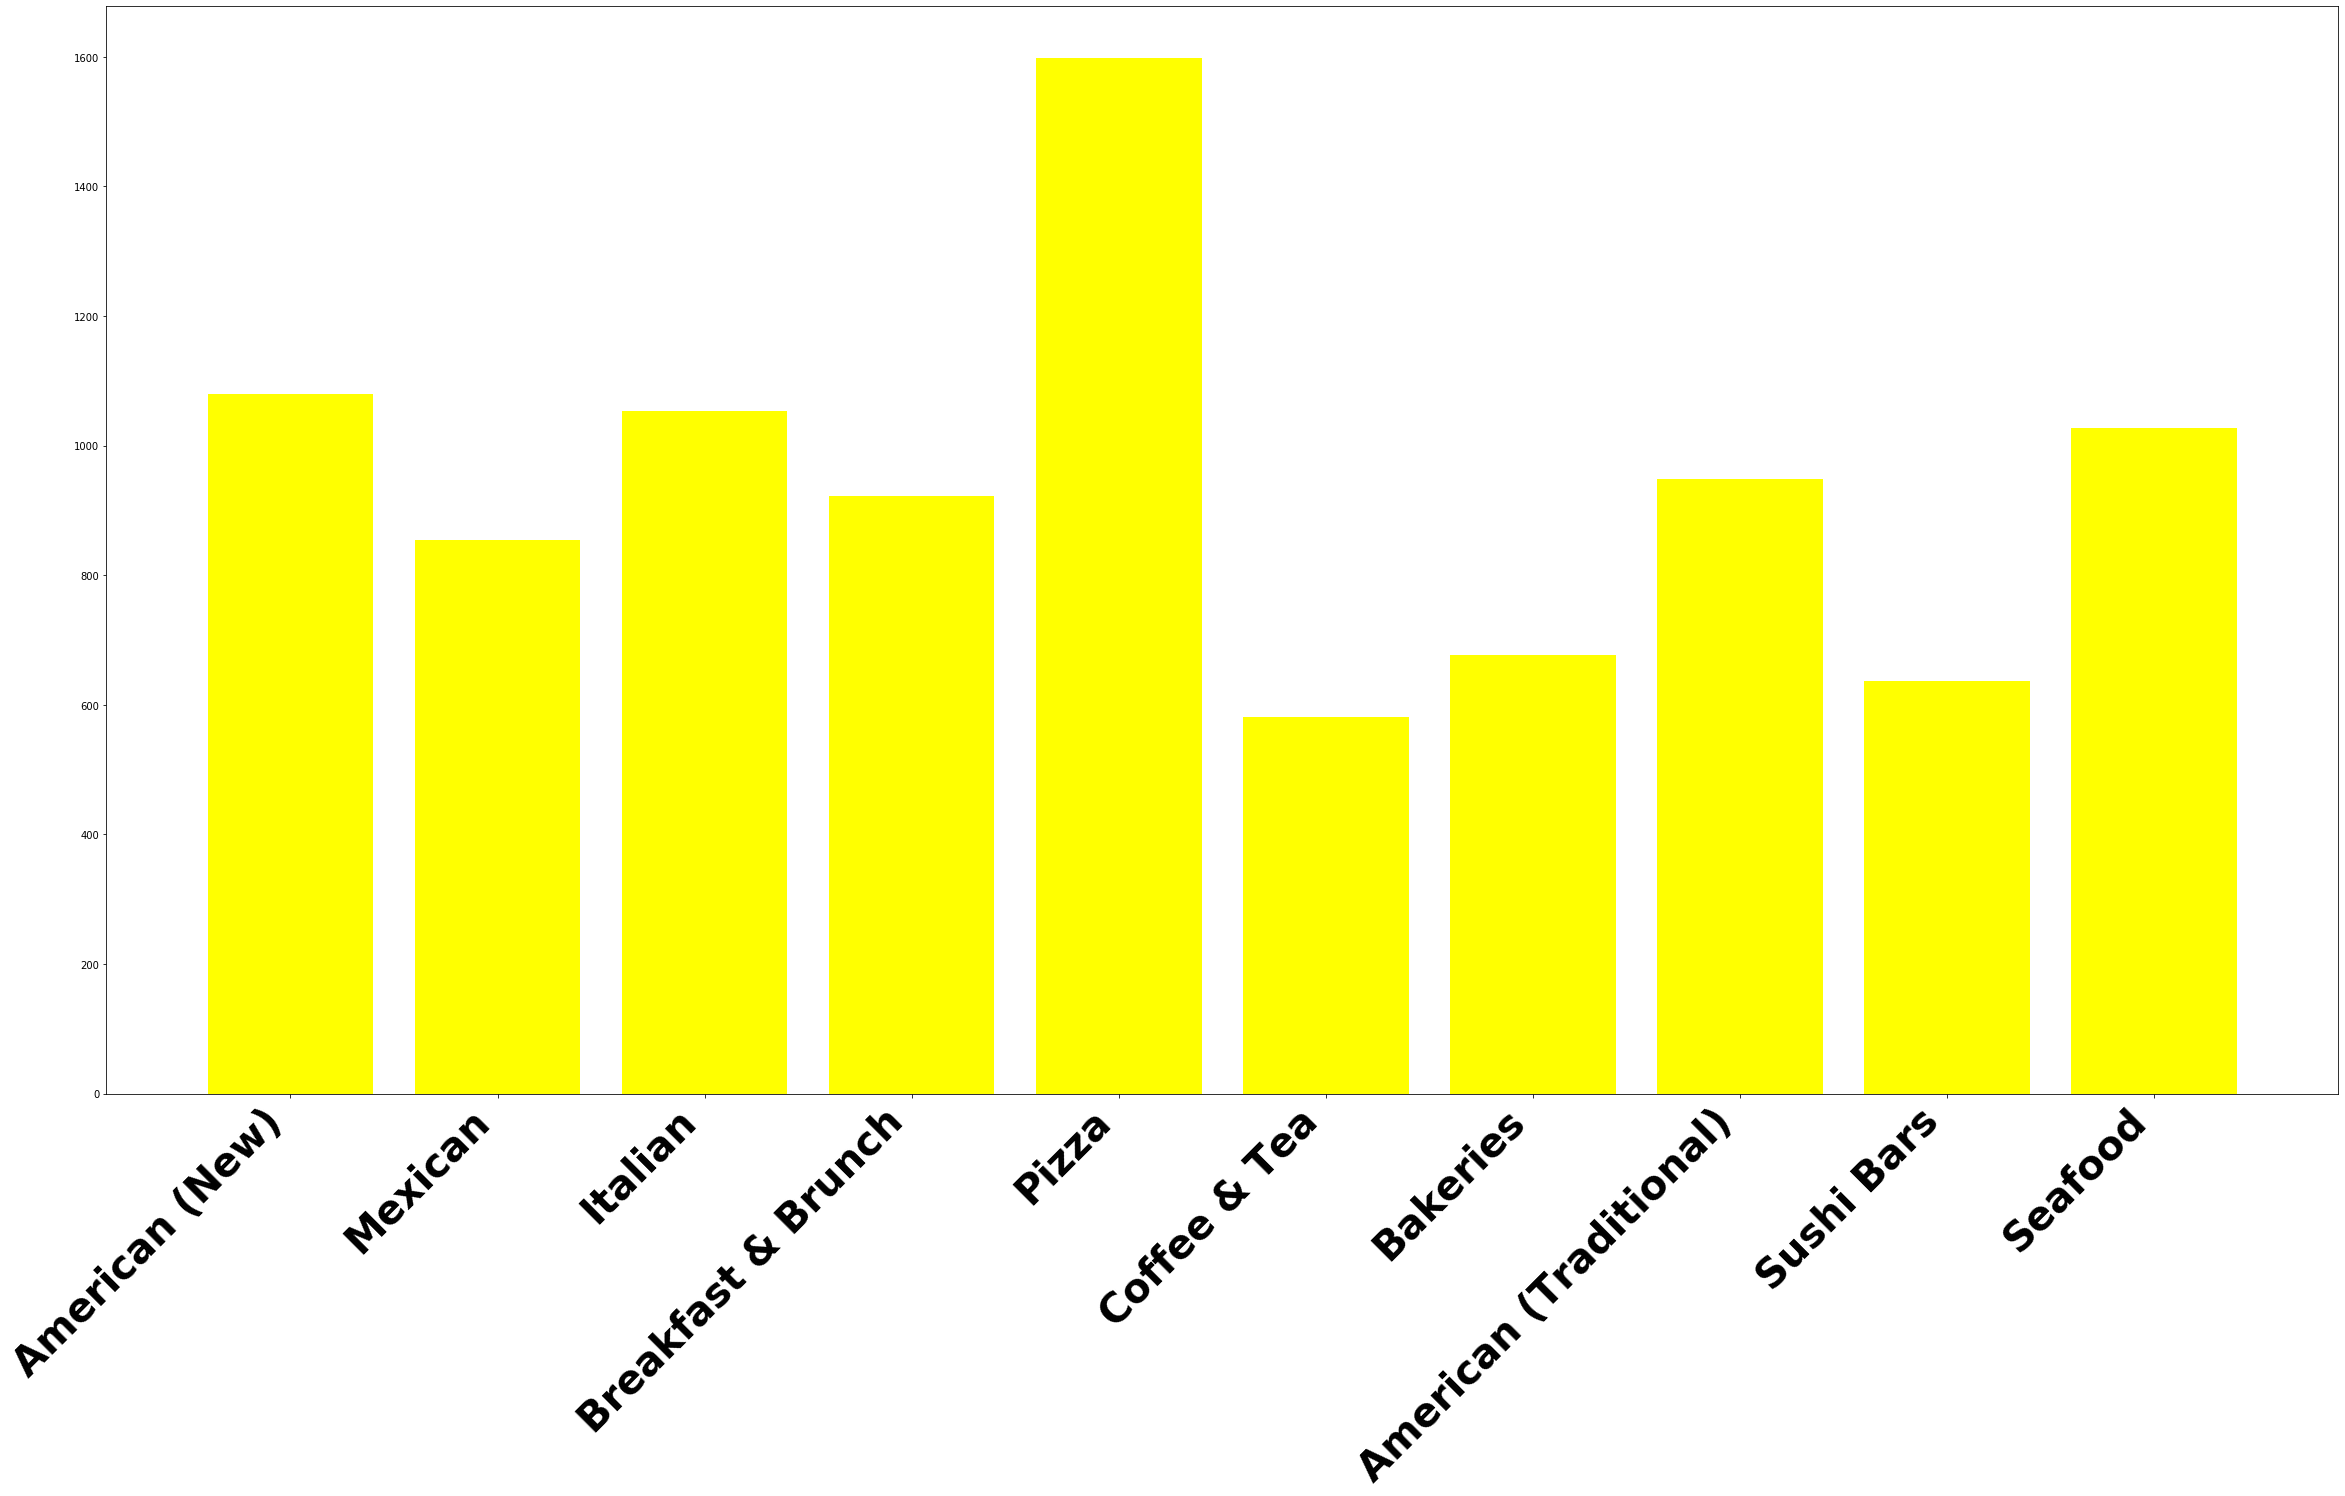

In [39]:
north_top_ten = pd.DataFrame(north_category_stats_df.sort_values(by='Number of Restaurants', ascending=False).head(10))
north_top_ten = north_top_ten.reset_index()
north_topten_unique = north_top_ten["Category"].unique()
# Bar Graph 
north_bar_topten = north_top_ten["Average # of Reviews per Restaurant"]
x_axis = north_topten_unique
plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, north_bar_topten, color='yellow', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, north_topten_unique, rotation=45, weight="bold", fontsize=40, ha='right');

# plt.xlim(-0.75, len(x_axis));
# plt.ylim(0, max(east_bar_avg_review)+100);
# plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=40, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=40);
plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=40);
# plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
# plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("plots/Top_Ten_North_BarGraph_Average_Reviews_By_Categories.png")


In [34]:
# need a location variable to plot heatmap
chicago_coordinates = north_data[["Latitude", "Longitude"]]
# chicago_coordinates
weights = north_data["Reviews"].astype(float)
# Heatmap 
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(chicago_coordinates, weights=weights,
                                   max_intensity=100,
                                   point_radius=10)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Grouped Data by State

In [ ]:
#these different codes will yield different pivot types of tables.

#this will yeild broken down by state and price averages
# grouped_merged_df = merged_table_df.groupby(['State'])

#this will break down by ratings in states.
# grouped_merged_df = merged_table_df.groupby(['State', 'Rating'])

#this will breakdown by state, ratings and price and offer price by rating
# grouped_merged_df = merged_table_df.groupby(['State', 'Price', 'Rating'])

#this changed to the grouping of the categories, Just redundant to the individual dataframes.
# grouped_merged_df = merged_table_df.groupby(['State', 'Category', 'Price'])

# grouped_merged_df = merged_table_df.groupby(['Category','Rating'])

#breakdown categories by top 10 popular
# grouped_merged_df = merged_table_df.groupby(['Category'])
# df.sort_values(by='col1', ascending=False)

In [ ]:
#call upon merged table of all states 'grouped_merged_df'
#this will yeild broken down by state and price averages
grouped_merged_df = merged_table.groupby(['State'])
total_grouped_categories = grouped_merged_df['Category'].count()
grouped_price_avg = grouped_merged_df['Price'].mean()
grouped_reviews_count = grouped_merged_df['Reviews'].mean()
total_grouped_review_counts = grouped_merged_df['Reviews'].count()
average_grouped_ratings = grouped_merged_df['Rating'].mean()
grouped_category_stats_df= pd.DataFrame({
    "Total Restaurants by State": total_grouped_categories,
    "Average Price Rating By Category": grouped_price_avg.round(2),
    "Average # of Reviews per Restaurant": grouped_reviews_count.astype(int),
    "Average Ratings by Category": average_grouped_ratings.round(2)
})
grouped_category_stats_df
# df.astype(int)
#use this code to rteset the index and use to plot graphs.
# grouped_category_stats_df.style.format({"Average # of Reviews per Restaurant": "{:}"})
#reset the index of the dataframe to pull state out for graphing purposes
grouped2 = grouped_category_stats_df.reset_index()
groupedCA = grouped2['State']
reviewsCA = grouped2['Average # of Reviews per Restaurant']

In [ ]:
#Bar Graph Plot showing the Average # of Reviews per Restaurant by State
plt.figure(figsize=(10,10))
plt.bar(groupedCA, reviewsCA, color='red', alpha=1, align='center')
tick_locations = [value for value in groupedCA]
plt.xticks(tick_locations, groupedCA, rotation=0, weight='bold', fontsize=15);
plt.xlim(-0.75, 4);
plt.ylim(0, max(reviewsCA)+100);
plt.title('Average Reviews Per Restaurant by State\n\n\n', fontsize=20, weight='bold');
plt.ylabel('# of Reviews\n\n', weight='bold', fontsize=15);
plt.xlabel('\nStates', weight='bold', fontsize=15);
